# Lead Scoring Case Study

## Problem Statement

X Education, an online education company, attracts numerous industry professionals to its website daily, where they explore available courses. While there is a substantial influx of initial interest and leads, only a small fraction ultimately become paying customers. The company needs to effectively nurture and engage these potential leads, offering education about the product and maintaining constant communication, to enhance lead conversion rates.

The primary challenge is to assist the company in identifying the most promising leads, those with the highest likelihood of converting into paying customers. The CEO has set a rough target lead conversion rate of approximately 80%.

## Objective

* Develop a logistic regression model for lead scoring, providing scores between 0 and 100.

* Higher scores signify leads with a greater chance of conversion, while lower scores indicate less likelihood of conversion.

* Ensure the model's flexibility to accommodate future changes and requirements presented in a separate document.

* The separate document will specify additional problems and adjustments, and these recommendations will be incorporated into the final presentation.

##### Importing required packages

In [1]:
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing Data

In [2]:
leads_df = pd.read_csv('Leads.csv')

In [3]:
# checking data

leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of the dataset

leads_df.shape

(9240, 37)

In [5]:
# dataset summary

leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking data types

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

After compairing with data dictionary datatypes of the columns look fine

## Data Cleaning

In [7]:
# checking for duplicates

leads_df[leads_df.duplicated(keep=False)]


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


there are no duplicates

There are some ID columns in the data which are probably unique. Let's see check if the columns are unqiue. If yes, let's drop them as these columns are not necessary for our analysis

In [8]:
# Checking if these columns have all the unique vlaues

print(sum(leads_df.duplicated(subset = 'Lead Number')))
print(sum(leads_df.duplicated(subset = 'Prospect ID')))

0
0


We can see, the columns have all the unique values. So we can drop them

In [9]:
# first lets keep a backup of the original data incase if we need it later

leads_df_og = leads_df.copy()

# Let's drop the columns now

leads_df.drop(['Lead Number','Prospect ID'],1, inplace=True)

In [10]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# exploring dataset to find the highest repeated values

leads_df.mode().iloc[0]

Lead Origin                                                  Landing Page Submission
Lead Source                                                                   Google
Do Not Email                                                                      No
Do Not Call                                                                       No
Converted                                                                          0
TotalVisits                                                                        0
Total Time Spent on Website                                                        0
Page Views Per Visit                                                               0
Last Activity                                                           Email Opened
Country                                                                        India
Specialization                                                                Select
How did you hear about X Education                               

We can observe there are some columns where "Select" is having maximum value count. This shows user has not selected any option for those fields

Let's replace "Select" with None

In [12]:
# to be confident let's calculate the number of "Select"
select_count = (leads_df == "Select").sum()

In [13]:
select_count

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

Now we can be confident about replacing **"Select"** with none. Specialization, How did you hear about X Education, Lead Profile, City these four columns has maximum number of **"Select"**. 

In [14]:
# Replacing "Select" with none

leads_df.replace('Select', np.nan, inplace=True)

In [15]:
# let's crosscheck
print((leads_df == "Select").sum())


Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

We have replaced all the "Select" values

## Exploratory Data Analysis

In [16]:
# Let's find the percentage of missing values

round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
# Let's drop columns having more than 40% null values
for col in leads_df.columns:
    if 100*(leads_df[col].isnull().sum()/len(leads_df[col]))>40:
        leads_df.drop(col, axis=1,inplace=True)


In [18]:
# Checking shape of the data
leads_df.shape

(9240, 28)

In [19]:
# Let's see which columns are left

for col in leads_df.columns:
    print(col)

Lead Origin
Lead Source
Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Last Activity
Country
Specialization
What is your current occupation
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Tags
Update me on Supply Chain Content
Get updates on DM Content
City
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


In [20]:
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

We can see that City has highes number of missing values

In [21]:
# lets check value counts for city
leads_df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
# lets create a function for plotting count

def count_plot(variable):
    counts = leads_df[variable].value_counts()
    plot_count = counts.plot.bar(color=sns.color_palette('deep'))
    plot_count.set(xlabel=variable, ylabel='Count')


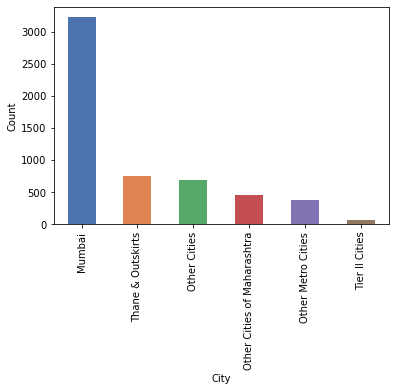

In [23]:
count_plot("City")

We can see, Mumbai has highest number. So we can impute missing values with mumbai

In [24]:
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

In [25]:
# We have removed Lead quality column, but it seems important. lets add it back

leads_df['Lead Quality'] = leads_df_og['Lead Quality'].copy()

In [26]:
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

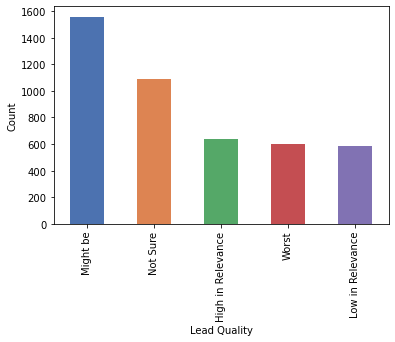

In [27]:
count_plot('Lead Quality')

We can impute missing values in Lead Quality with Not sure. As we can infer kepping it blank means maybe user was not sure about that option.

In [28]:
# imputing missing values with Not sure
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Not Sure')

In [29]:
# Lets check remaining columns

leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Quality'],
      dtype='object')

In [30]:
# Now lets check remaing column with nulls

round((leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df))*100,2)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Quality                                      0.00
Search                                            0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Magazine                                          0.00
Last Notable Activity                             0.00
Newspaper Article                                 0.00
X Educatio

Specialization has highes number of nulls

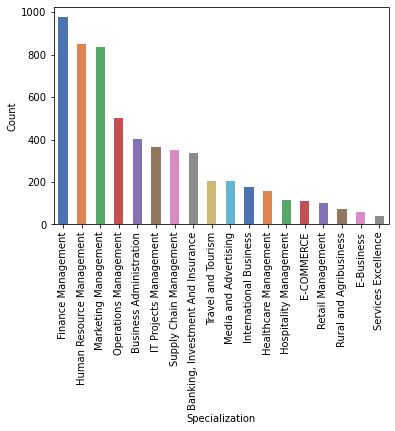

In [31]:
# Lets visualize specialization

count_plot('Specialization')

There are many secializations. It would not be good to impute with any specialization. There might me a case where some users might not have any specialization. So lets create a new category as othrs

In [32]:
# Creating a new category Othrs

leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'othrs')

So lets look for the remaining columns with higher null values

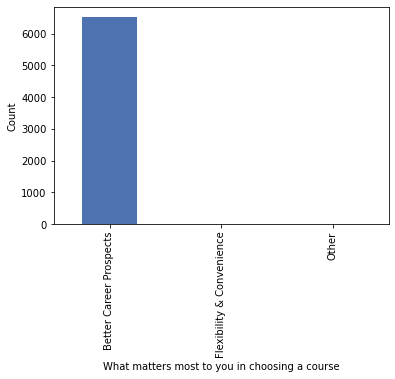

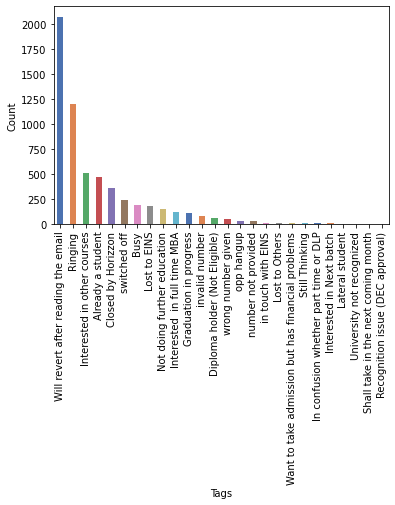

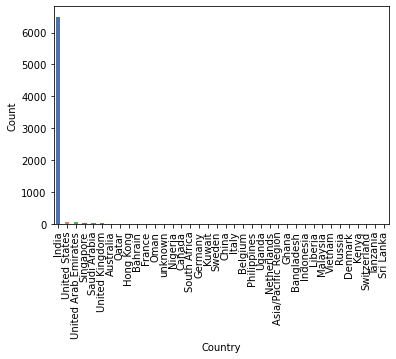

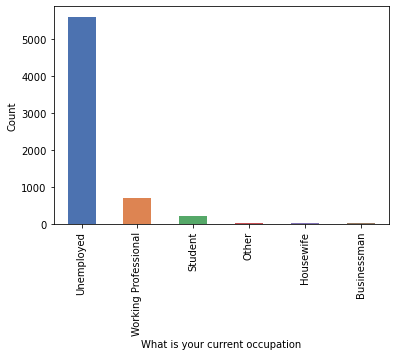

In [33]:
# remaining columns with higher nulls are "What matters most to you in choosing a course" , "Tags", "Country" & "What is your current occupation"

# lets visualize them

col_lst = ["What matters most to you in choosing a course" , "Tags", "Country" ,"What is your current occupation"]

for col in col_lst:
    count_plot(col)
    plt.show()

from the above plots we can see all the columns has one highest value. So lets impute this columns with thier highest number of values

In [34]:
#creating a list of highest values
highest_vals = []
for col in col_lst:
    highest_vals.append(leads_df[col].mode()[0])

In [35]:
# now lets impute missing values for the above columns

for col in col_lst:
    counter = 0
    leads_df[col] = leads_df[col].replace(np.nan, highest_vals[counter])
    counter = counter + 1

In [36]:
# Now lets check remaing column with nulls

round((leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df))*100,2)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Quality                                     0.00
Search                                           0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Magazine                                         0.00
Last Notable Activity                            0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

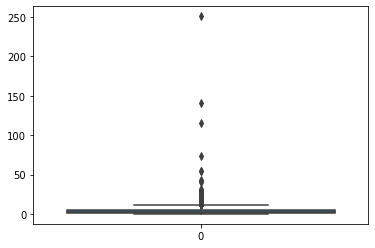

In [37]:
# now lets plot "TotalVisits" , 'Page Views Per Visit'. both columns are numeric so lets plot a box plot

sns.boxplot(leads_df['TotalVisits'])
plt.show()

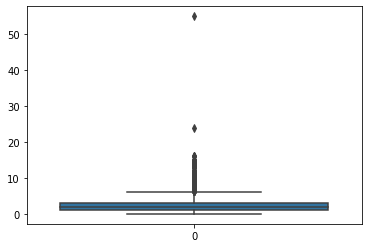

In [38]:
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

We can observe variation in both the columns. Since the number of nulls is low so we can drop the rows having missing values

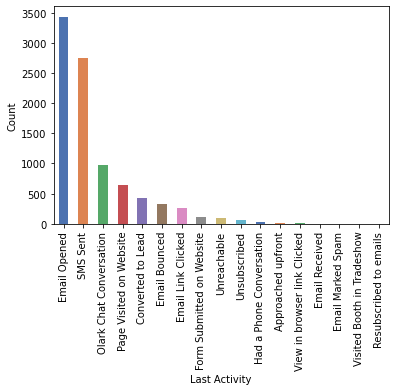

In [39]:
# Not lets check for "Last Activity" , "Lead Source"

count_plot("Last Activity")

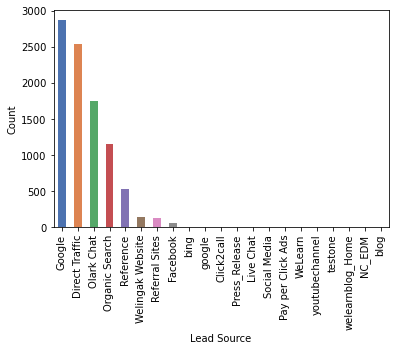

In [40]:
count_plot("Lead Source")

We can observe the frequencies of the values are close to each other. Hence imputing is not a feasible solution. But, since the missing values are very less we can drop the rows

In [41]:
# dropping missing values

leads_df.dropna(inplace=True)

In [42]:
# Lets confirm

round((leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df))*100,2)

Lead Quality                                     0.0
Search                                           0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Magazine                                         0.0
Last Notable Activity                            0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

There are no missing values

In [43]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

### Data Visualisation

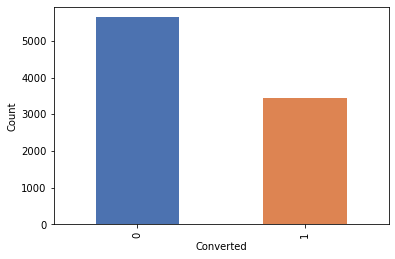

In [44]:
# Visualizing target variable "Converted"

count_plot('Converted')

In [45]:
# lets check percentage of conversions
leads_df.Converted.value_counts('1')*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

So we can see that 37.8% leads are converted. It implies we have enough data for modelling

### Univariate analysis of numereical variables

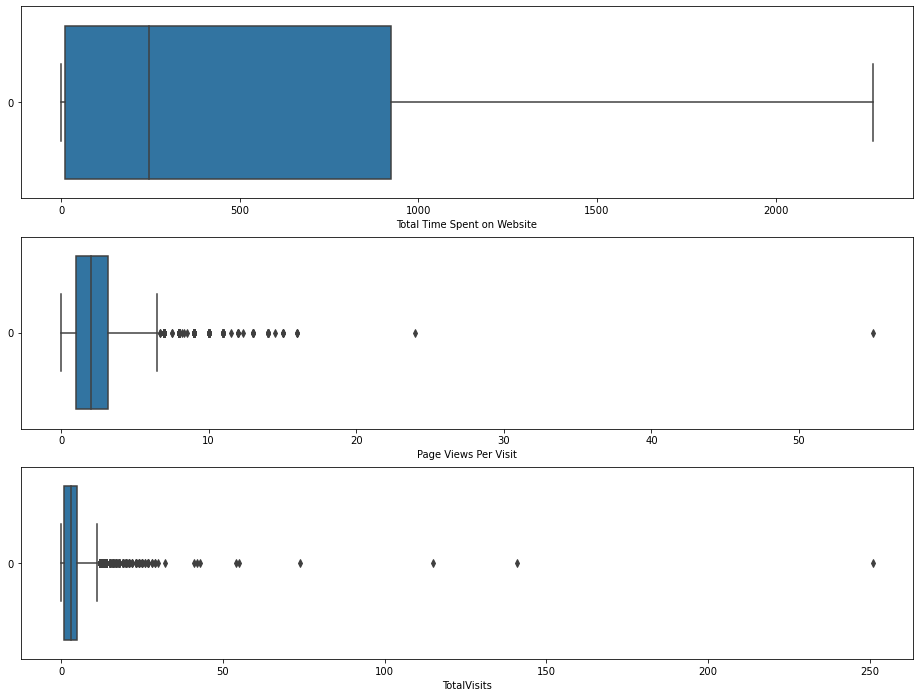

In [46]:
# Lets use boxplots

var_num = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']
plt.figure(figsize=(16,12))

for i in var_num:
    plt.subplot(3,1,var_num.index(i)+1)
    sns.boxplot(leads_df[i], orient="h")
    plt.xlabel(i)
plt.show()

In [47]:
leads_df[var_num].describe([.25, .5, .75, .90, .95])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,482.887481,2.370151,3.456028
std,545.256560,2.160871,4.858802
min,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,922.750000,3.200000,5.000000
90%,1373.000000,5.000000,7.000000
95%,1557.000000,6.000000,10.000000
max,2272.000000,55.000000,251.000000


* We can see that for **TotalVisits** 95% quartile is 10 and the max value is 251. So, lets consider values till only till 95% for our analysis
* For **Page Views Per Visit** also lets do the same
* There are no significant outliers in **Total Time Spent on Website**

### Outlier Treatment

In [48]:
leads_df['TotalVisits'][leads_df['TotalVisits'] >= leads_df['TotalVisits'].quantile([0.95]).values[0]] = leads_df['TotalVisits'].quantile([0.95]).values[0]

leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= leads_df['Page Views Per Visit'].quantile([0.95]).values[0]] = leads_df['Page Views Per Visit'].quantile([0.95]).values[0]

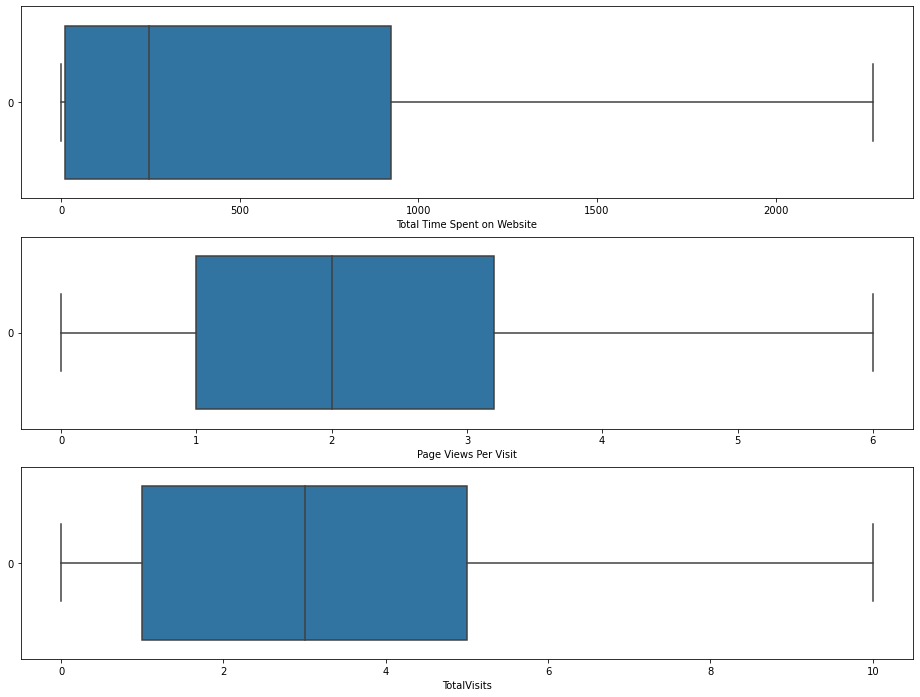

In [49]:
# lets verify
plt.figure(figsize=(16,12))
for i in var_num:
    plt.subplot(3,1,var_num.index(i)+1)
    sns.boxplot(leads_df[i], orient="h")
    plt.xlabel(i)
plt.show()

we can see that outliers have been treated

### Bivariate analysis of numerical variables

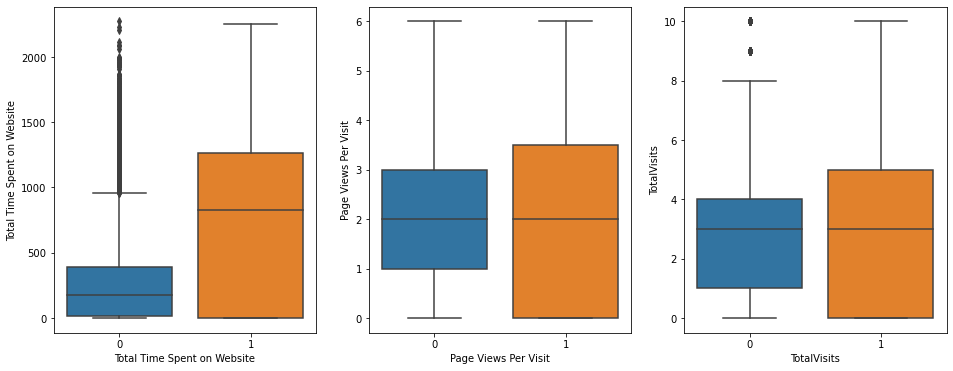

In [50]:
# plotting numerical variables aginst target variables

plt.figure(figsize=(16,6))

for i in var_num:
    plt.subplot(1,3,var_num.index(i)+1)
    sns.boxplot(y = i , x = 'Converted', data = leads_df)
    plt.xlabel(i)
plt.show()

* "Page Views Per Visit" and "TotalVisits" has same median as target variable. So can't conclude anything
* By looking at "Total Time Spent on Website" plot. we can say that people spending more time on website are more likely to be converted

### Bivariate analysis of categorical variables

In [51]:
var_cat = leads_df.columns[leads_df.dtypes == 'object'].to_list()

In [52]:
var_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Lead Quality']

In [53]:
# creating a function to create count plots for categorical variables

def CatVarPlot(CatVar):
    plt.figure(figsize=(22, 10))
    sns.countplot(x = CatVar, hue = "Converted", data = leads_df)
    plt.xticks(rotation = 90)
    plt.show()

# for multiple varibles

def CatVarPlots(CatVar_lst):
    a = int(len(CatVar_lst)/2)
    plt.figure(figsize=(22, a*10))
    for i in CatVar_lst:
        plt.subplot(a,2,CatVar_lst.index(i)+1)
        sns.countplot(x = i, hue = "Converted", data = leads_df)
        plt.xticks(rotation = 90)
    plt.show()

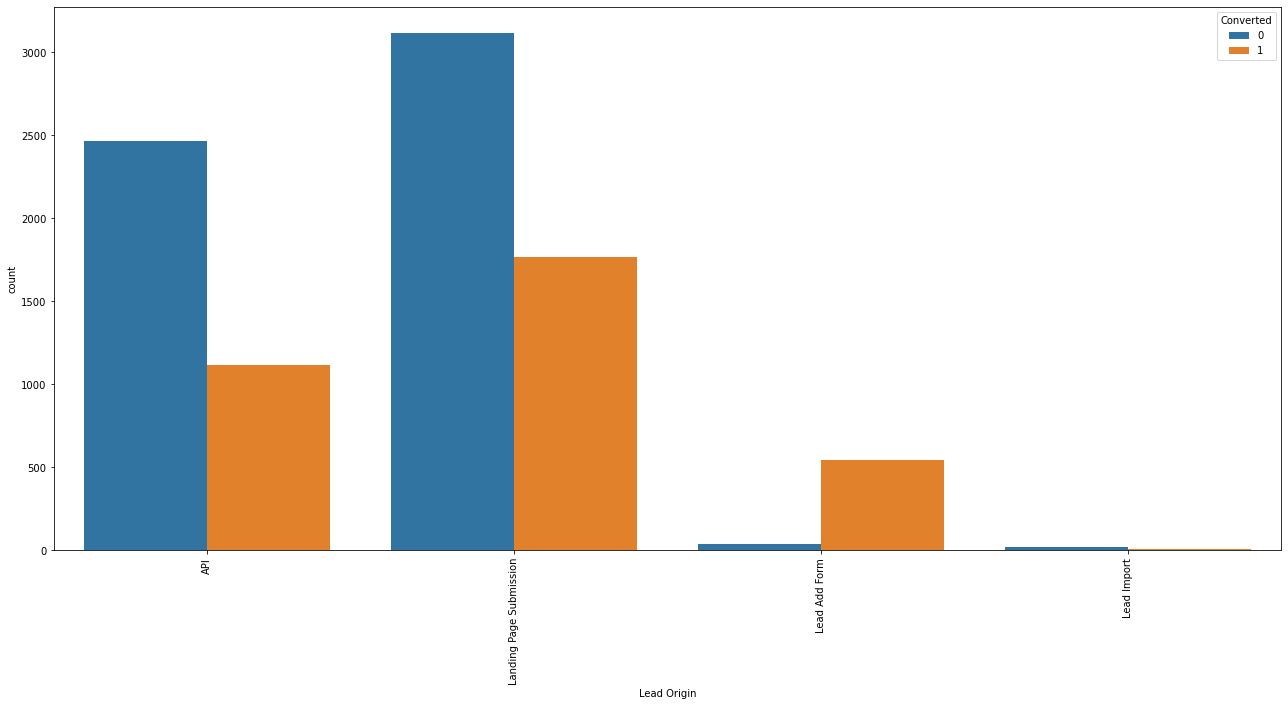

In [54]:
# for Lead Origin

CatVarPlot(var_cat[0])

from the above chart we can observe that **API** and **Landing page submission** generates maximum leads, but conversion rate is low. Compared to **lead add form** which generate less leades buth the conversion rate is high. We should focus on increasing leads conversion for **APLI** and **Landing page submission**. Also, need to increase lead generation using **Lead add form** as it is showing good conversion rate

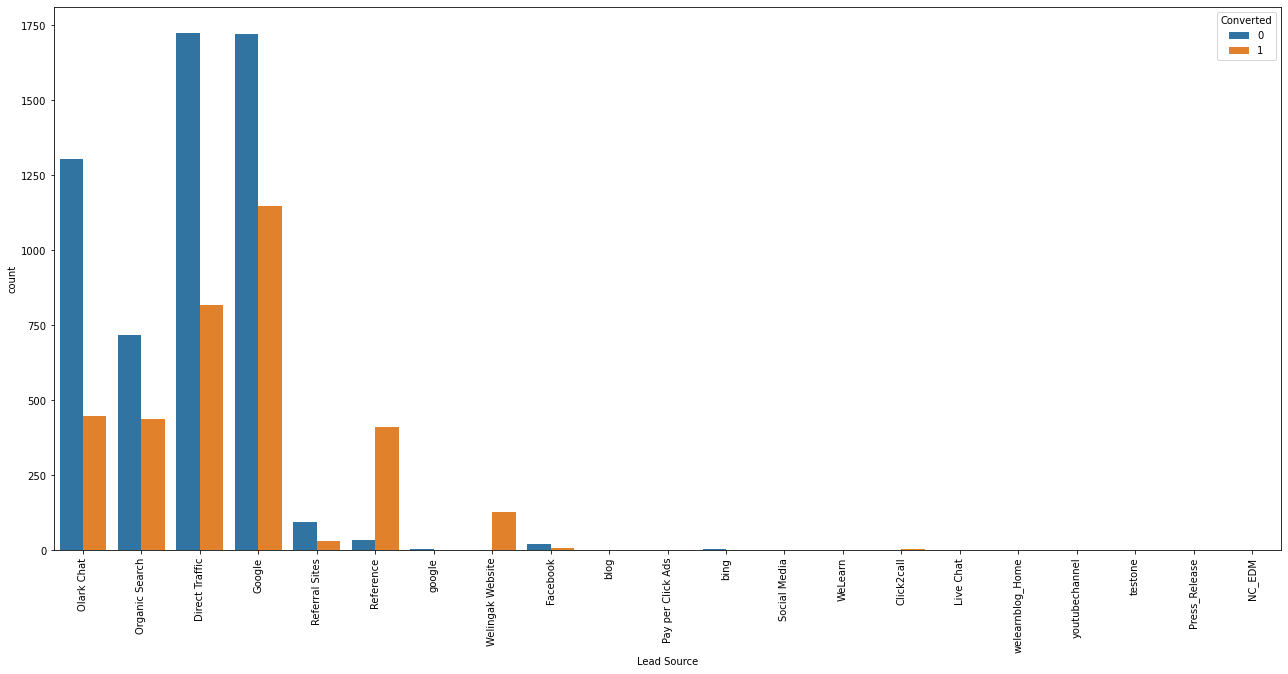

In [55]:
# now lets plot sources of leads

CatVarPlot(var_cat[1])

we can see that Google and google are same but due to case diffrence those are showing as diffrent categories. Also Categories after Facebook are almost zero. So lets combine all and put it into a new category Others.

In [56]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')

In [57]:
# lets see the list of unique values in the column Lead Source

sources = leads_df['Lead Source'].unique()
sources

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

So we will put the sources after Facebook to the new category **Others**

In [58]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(sources[8:], 'Others')

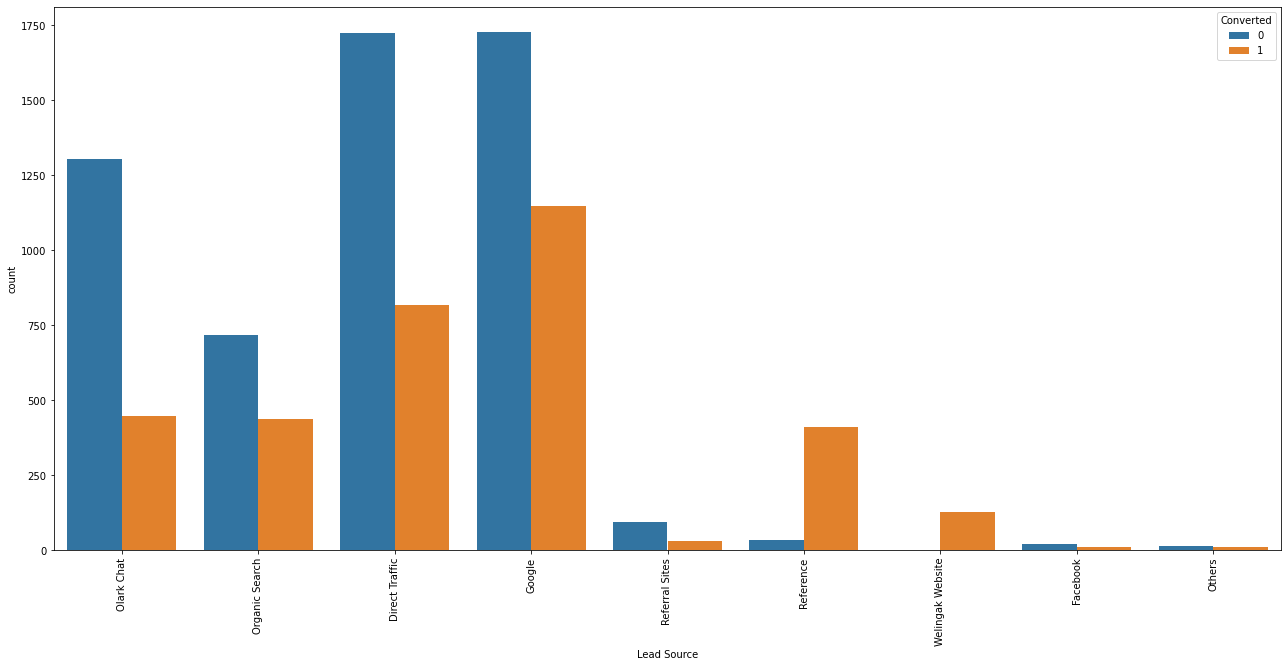

In [59]:
# Now lets visualise again

CatVarPlot(var_cat[1])

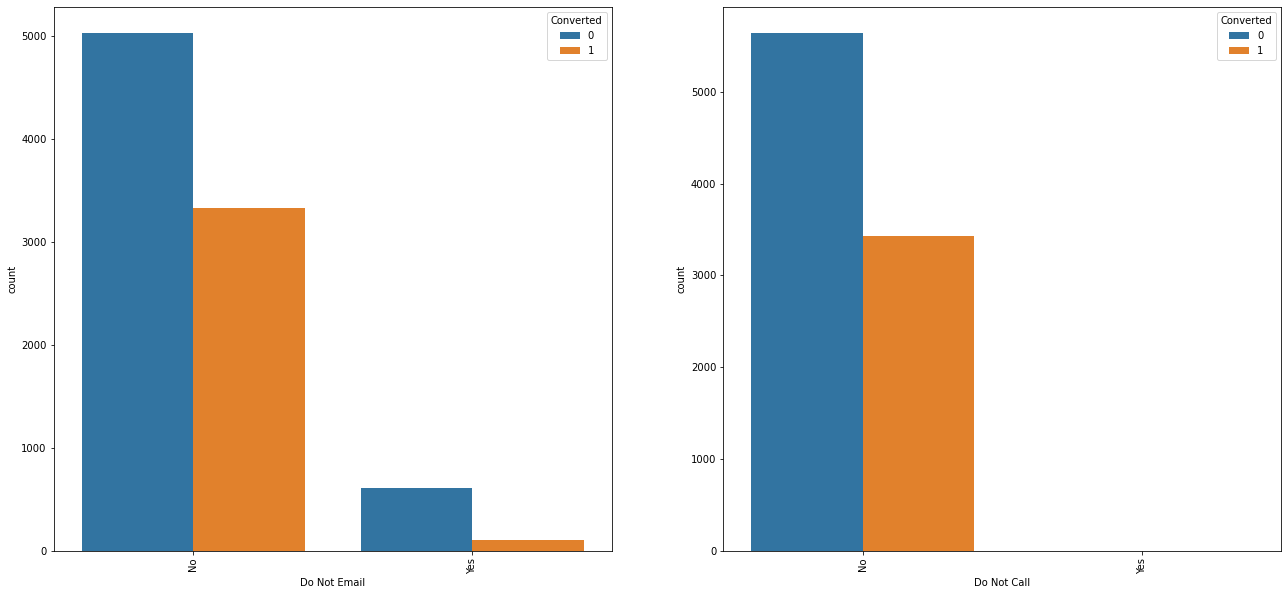

In [60]:
CatVarPlots([var_cat[2], var_cat[3]])

Maximum responces are negetive for both the variables

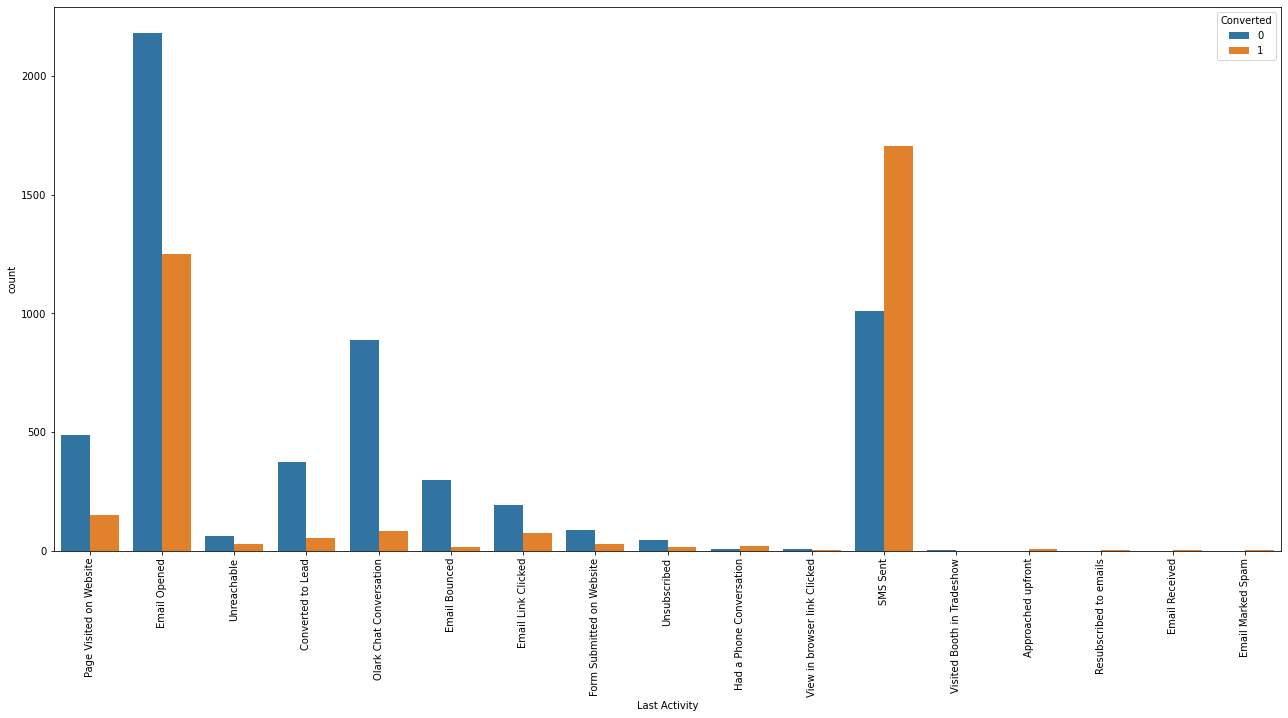

In [61]:
CatVarPlot(var_cat[4])

Max number of leads are generated for the Last Activity **Email opened**. But Maximum conversions happened in Last activity **SMS sent** 

We can aggregate activities after SMS sent in a single category

In [62]:
activities = leads_df['Last Activity'].unique()
activities

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

We can club last five categories

In [63]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(activities[-5:], 'Others')

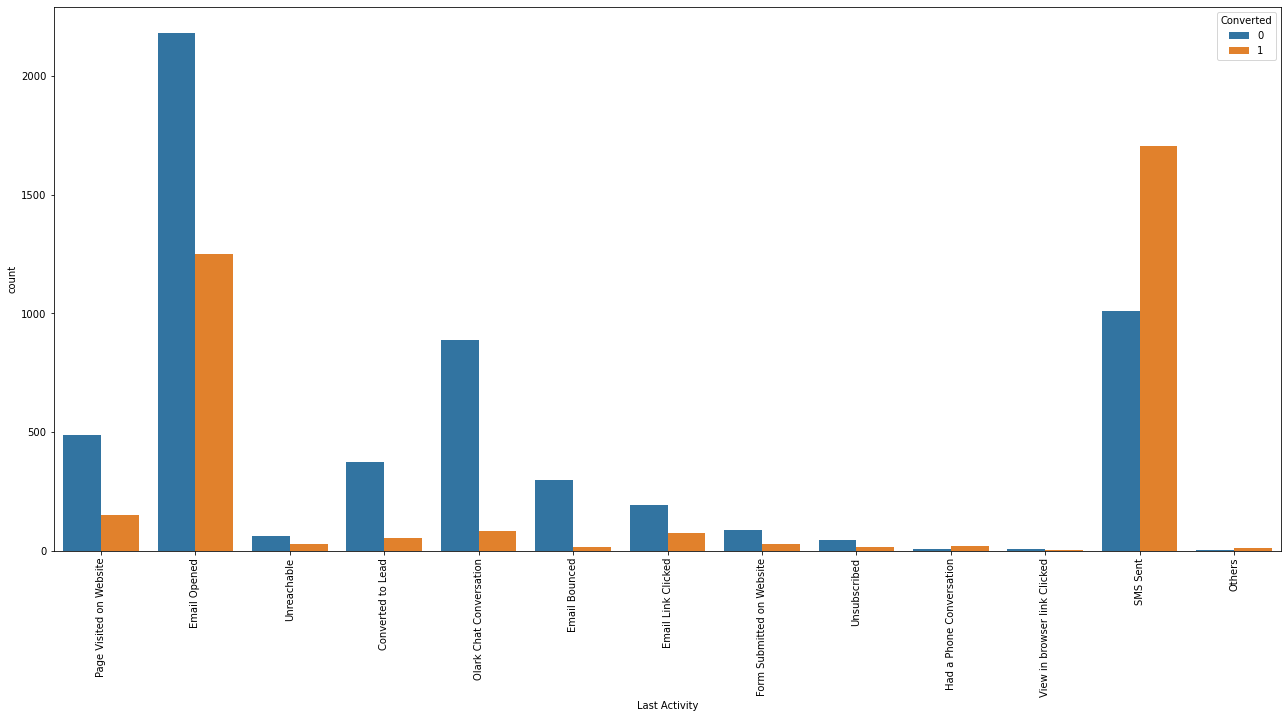

In [64]:
# lets visualise

CatVarPlot(var_cat[4])

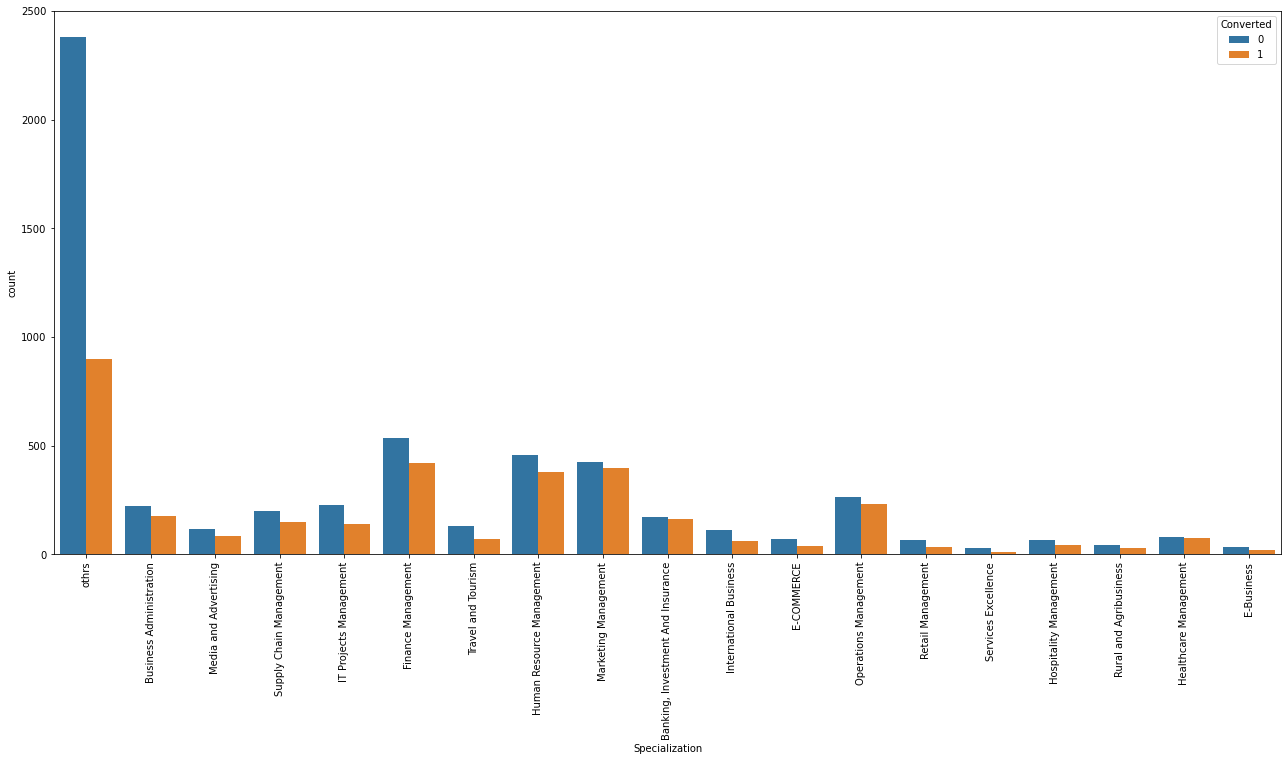

In [65]:
CatVarPlot(var_cat[6])

Conversion rates are almost at par across all the specialisations

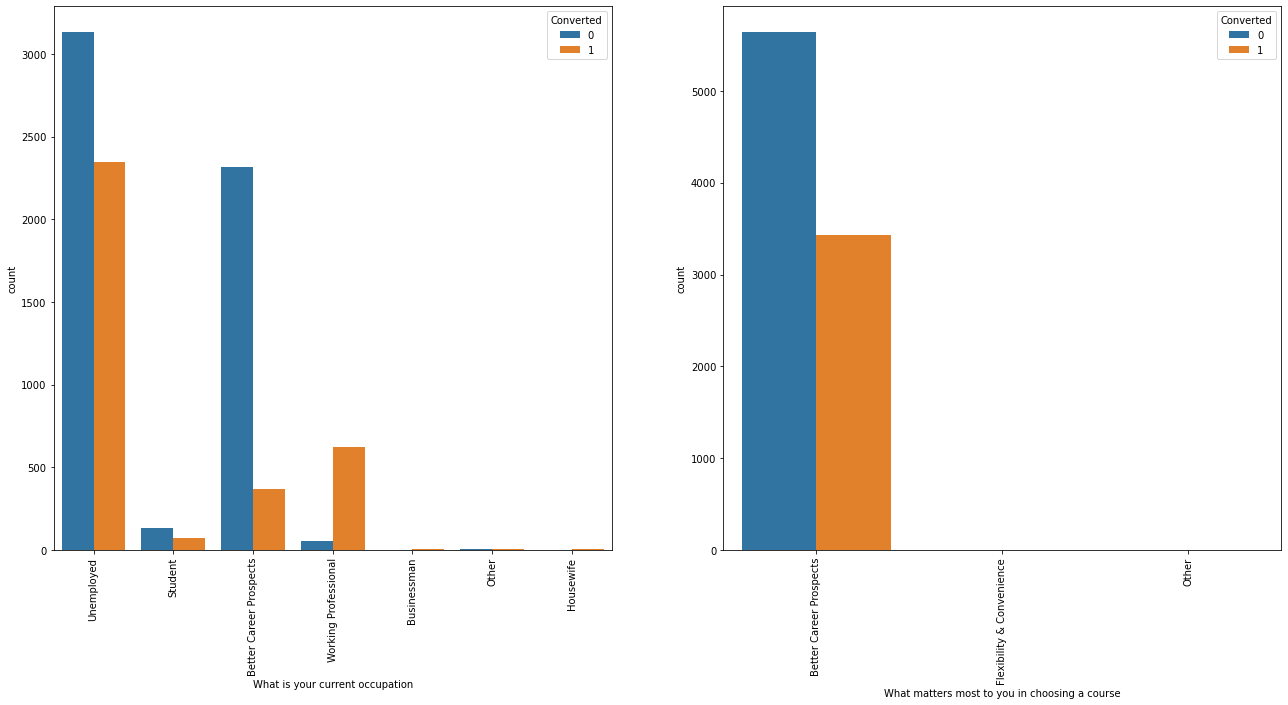

In [66]:
CatVarPlots([var_cat[7],var_cat[8]])

* Working professionals shows the highest convewrsion rate
* Only one category with a significant count in **What matters most to you in choosing a course**

In [67]:
len(var_cat)

25

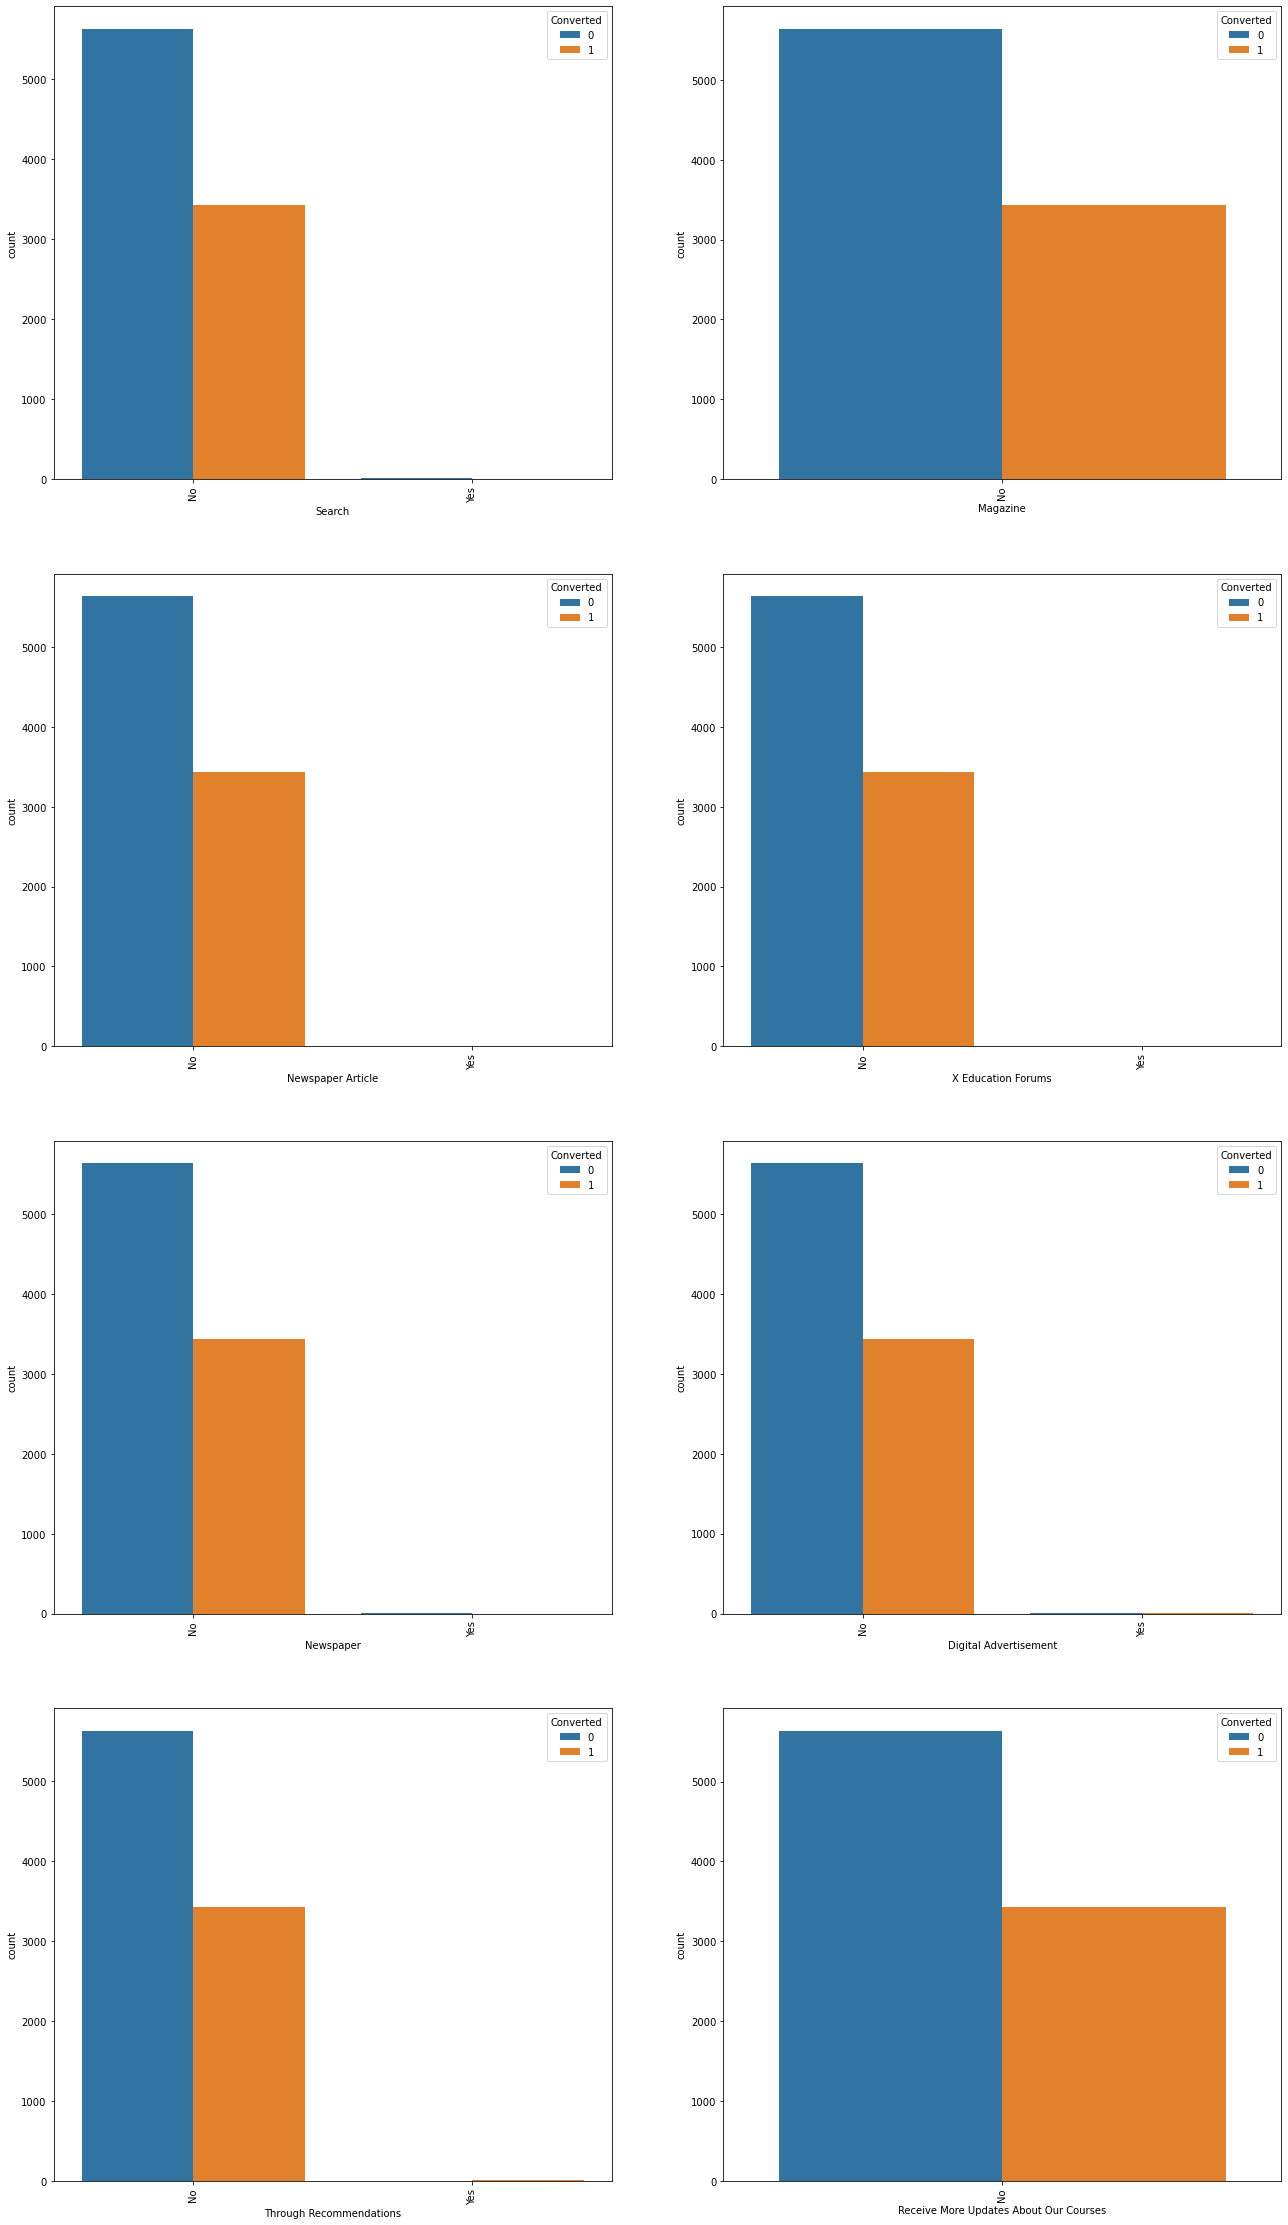

In [68]:
# Lets plot the next set of variables

CatVarPlots(var_cat[9:17])

Nothing can be inferred from the above variables as maximum are not converted

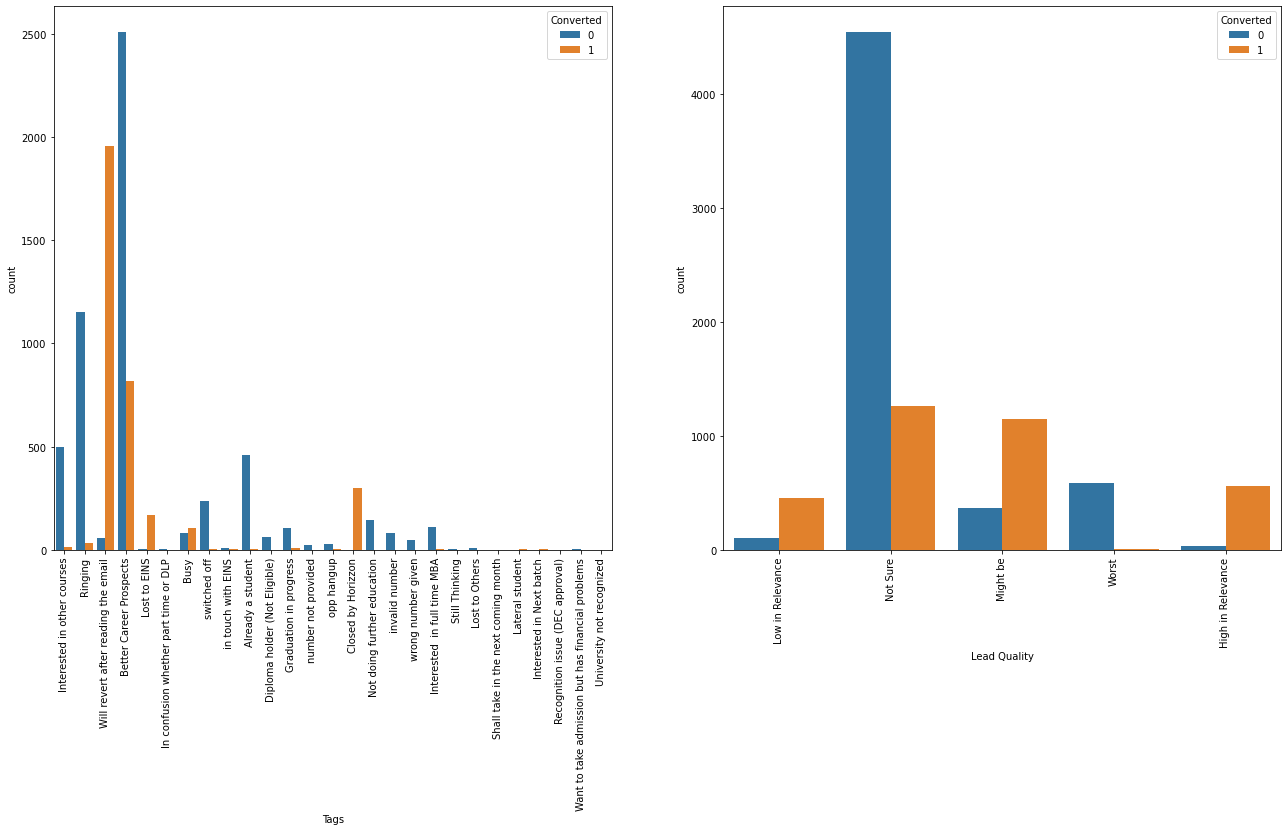

In [69]:
CatVarPlots([var_cat[17], var_cat[-1]])

* Categories after **Interested in full time MBA** have negligible leads. So will combine them in a single category
* **will revert after reading the email** has highest number of leads generated and coversions.
* In lead qualoty **Might be** has the highest conversion rate and **Worst** has lowest

In [70]:
tags = leads_df['Tags'].unique()
tags

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Better Career Prospects',
       'Lost to EINS', 'In confusion whether part time or DLP', 'Busy',
       'switched off', 'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [71]:
# Lets put negligible categories from the tags in separate categoty

leads_df['Tags'] = leads_df['Tags'].replace(tags[-8:], 'Others')

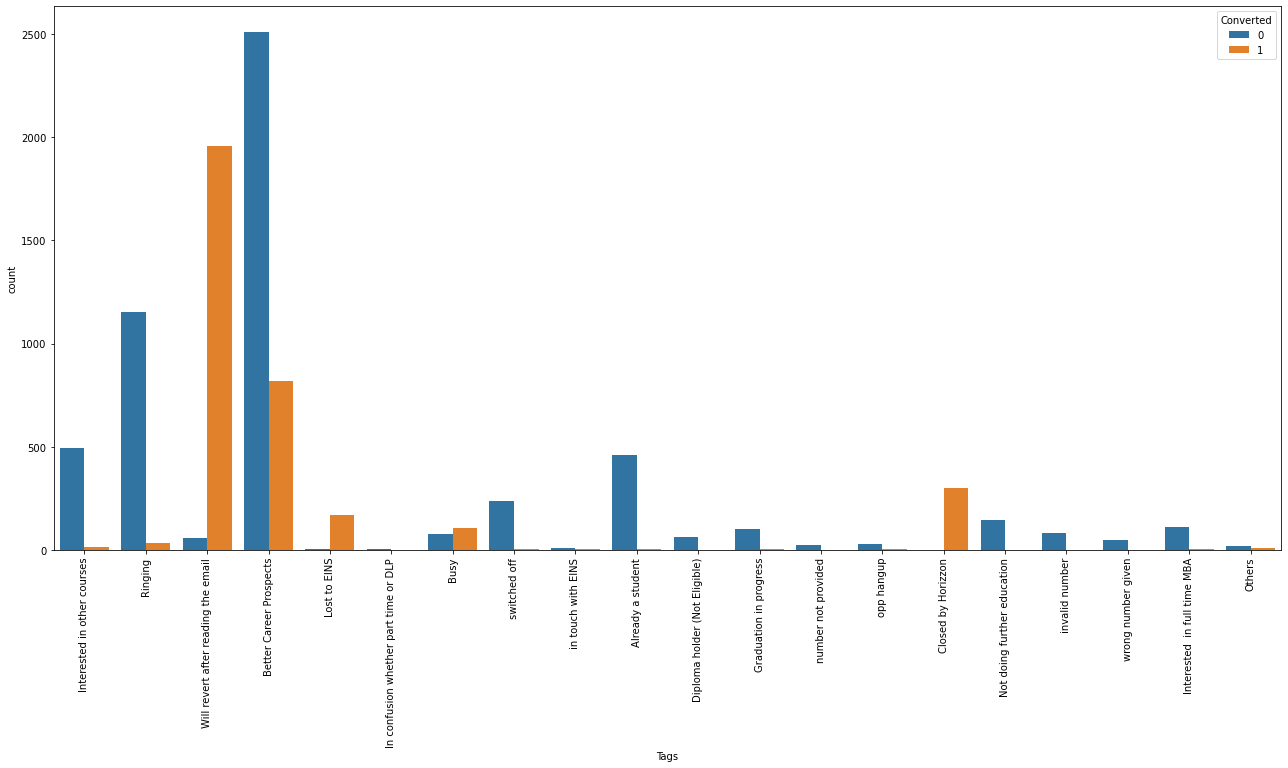

In [72]:
CatVarPlot(var_cat[17])

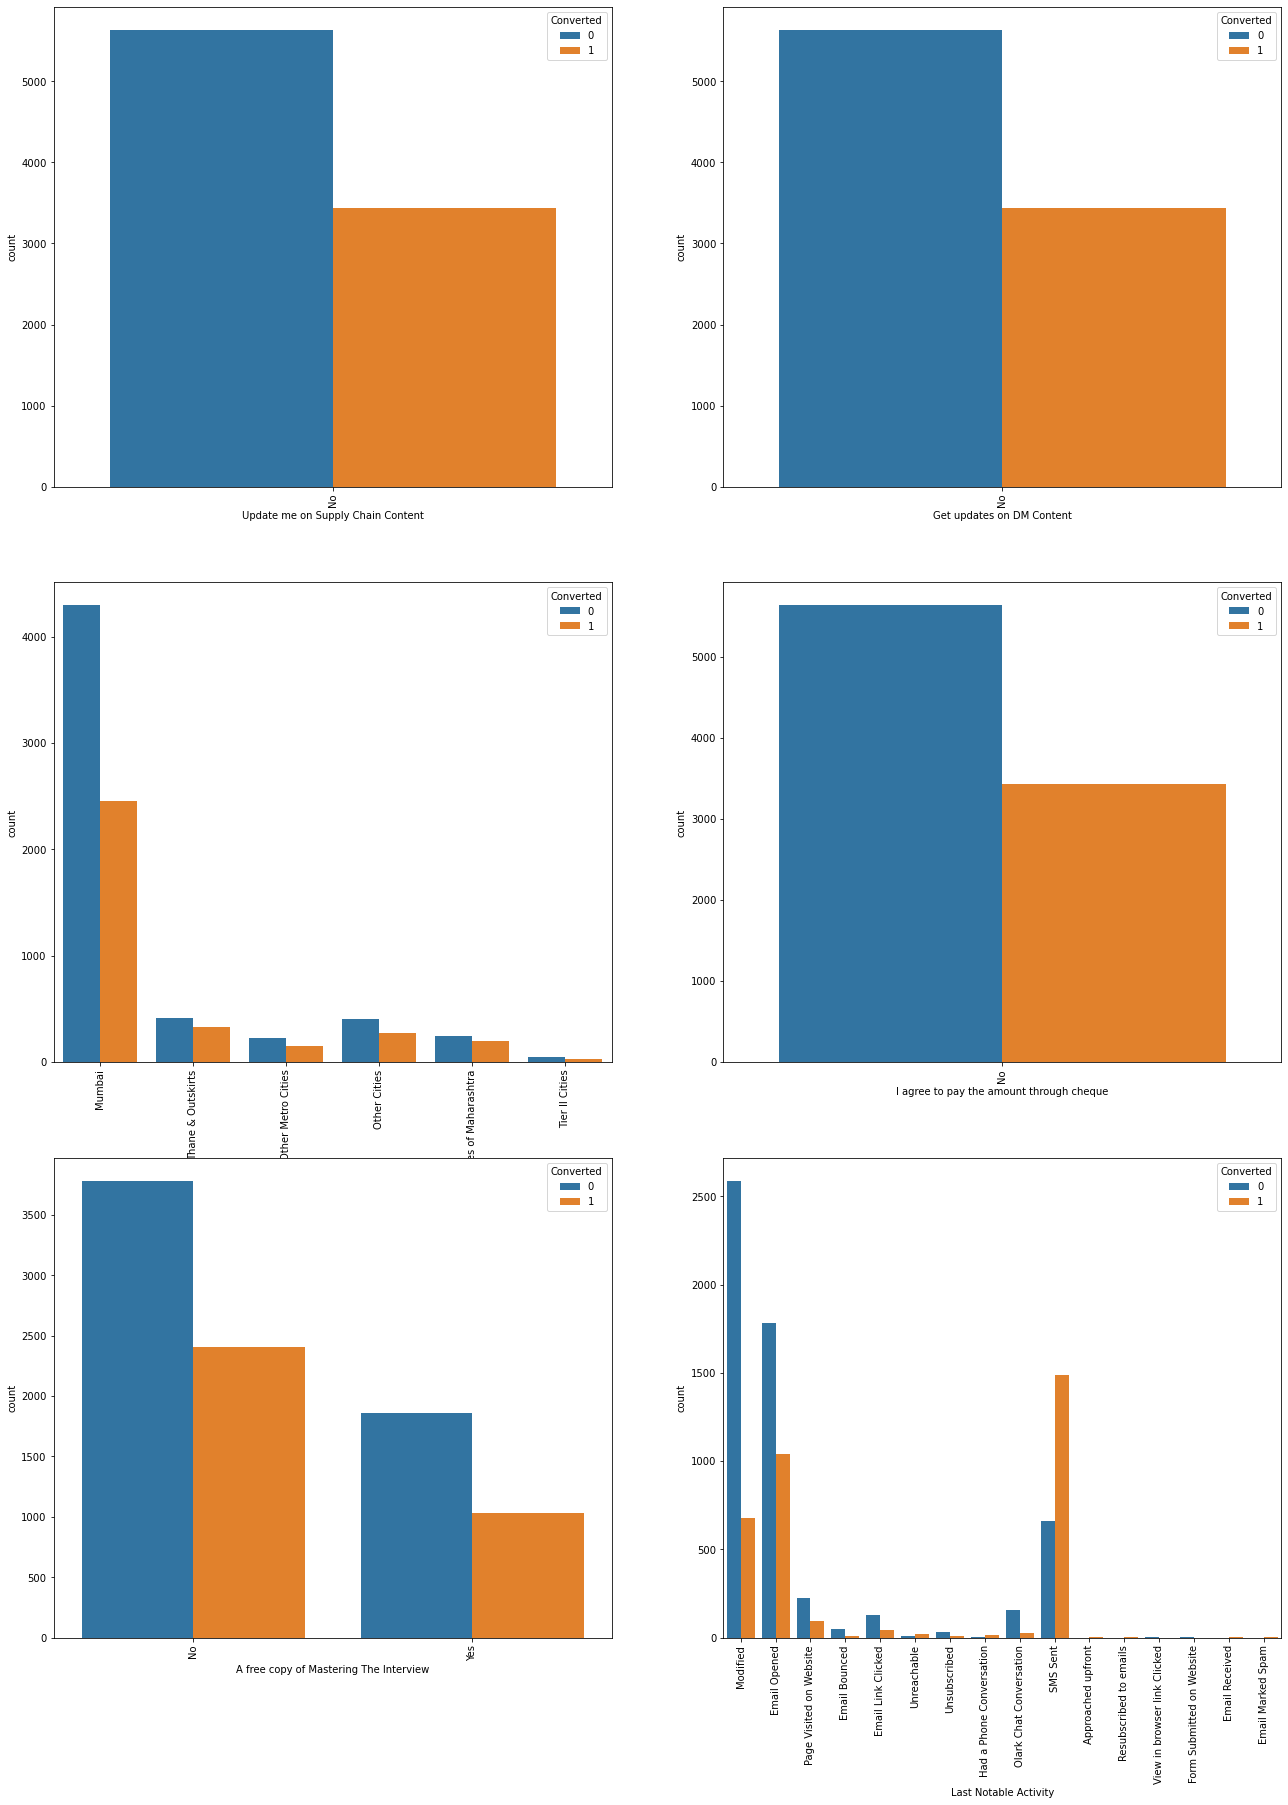

In [73]:
CatVarPlots(var_cat[18:24])

* Several of these variables appear to have limited significance in our analysis, primarily due to the predominance of a single category, often labeled as 'NO'.

* In the case of the 'City' variable, a majority of leads originate from 'Mumbai'.

* When considering the option 'A free copy of Mastering The Interview', both categories exhibit similar conversion rates, indicating that this variable may not strongly influence the outcome.

* Regarding 'Last Notable Activity', it may be beneficial to consolidate categories beyond the point of 'SMS Sent', similar to the 'Last Activity' variable. 'Modified' appears to be the most common category for lead generation, while 'SMS Sent' demonstrates the highest conversion rate, suggesting its significance.







In [74]:
notable_activity = leads_df['Last Notable Activity'].unique()
notable_activity

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

we don't need last 6 categories

In [75]:
# Let's put these categories into a separate category

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(notable_activity[-6:], 'Others')

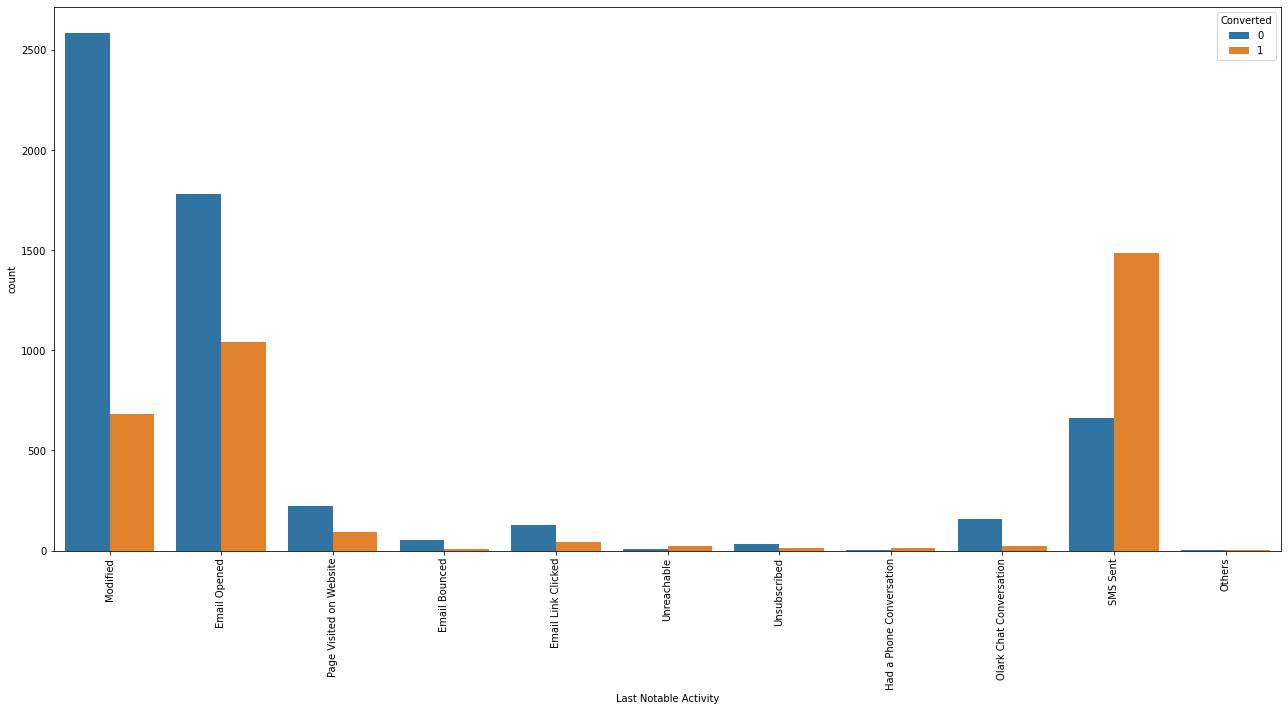

In [76]:
CatVarPlot(var_cat[23])

Taking cues from the data visualization, we can safely eliminate variables that lack significance for analysis and contribute minimal information to the model.

In [77]:
leads_df = leads_df.drop(['Get updates on DM Content',
 'What matters most to you in choosing a course',
 'Newspaper Article',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque',
 'Magazine',
 'A free copy of Mastering The Interview',
 'Newspaper',
 'Country',
 'X Education Forums',
 'Through Recommendations',
 'Search',
 'Do Not Call',
 'Digital Advertisement',
 'Receive More Updates About Our Courses'],1)

In [78]:
# This is our final dataframe

leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Quality
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,othrs,Unemployed,Interested in other courses,Mumbai,Modified,Low in Relevance
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,othrs,Unemployed,Ringing,Mumbai,Email Opened,Not Sure
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,Might be
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,Not Sure
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,othrs,Unemployed,Will revert after reading the email,Mumbai,Modified,Might be


In [79]:
leads_df.shape

(9074, 14)

In [80]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


In [81]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

### Data Preparation

In [82]:
leads_df['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

we can convert **Do Not Email** column values to binary

In [83]:
# Converting values to binary
leads_df['Do Not Email'] = leads_df['Do Not Email'].map({'Yes': 1, 'No': 0})

In [84]:
leads_df['Do Not Email'].unique()

array([0, 1], dtype=int64)

### Dummy Variables

Creating dummy variables for the categorical variables having multiple levels

In [85]:
var_cat = leads_df.columns[leads_df.dtypes == 'object'].to_list()
var_cat

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity',
 'Lead Quality']

In [86]:
# creating dummy variable

dummy_vars = pd.get_dummies(leads_df[var_cat], drop_first=True)

# adding dummies to original dataframe

leads_df = pd.concat([leads_df, dummy_vars], axis=1)

# dropping original columns

leads_df = leads_df.drop(var_cat,1)

In [87]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Test-Train split

In [88]:
# Importing necessary packages

from sklearn.model_selection import train_test_split

In [89]:
# assigning feature variables to X

X = leads_df.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
# To assign target variable to y

y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitiing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [92]:
# Importing necessary packages

from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
# We have alread store numerical variables to a list
var_num

['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']

In [95]:
# Scaling continous variables

X_train[var_num] = scaler.fit_transform(X_train[var_num])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [96]:
# Conversion rate

Conv_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Conv_rate

37.85541106458012

We are having 37.85% conversion rate

### Model Building

#### Feature selection using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
L_reg = LogisticRegression()

In [98]:
# Running RFE on 15 variables
from sklearn.feature_selection import RFE
rfee = RFE(L_reg, n_features_to_select=15)            
rfee = rfee.fit(X_train, y_train)

In [99]:
# RFE output

rfee.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True])

In [100]:
list(zip(X_train.columns, rfee.support_, rfee.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 49),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 67),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 74),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Form Submitted on Website', False, 70),
 ('Last Activity_Had a Phone Conversation', False, 29),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Others', False, 28),
 ('Last Activity_Page Visited on Website', False, 64),
 ('L

In [101]:
#  selected features
Selected_cols = X_train.columns[rfee.support_]
Selected_cols

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Better Career Prospects', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified', 'Lead Quality_Worst'],
      dtype='object')

In [102]:
# These feaures are eliminated by RFE

X_train.columns[~rfee.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
     

#### Model assessment using StatsModel

In [103]:
import statsmodels.api as sm

# lets create a model building function for our ease
def model_builder(X,y):
    X_statsM = sm.add_constant(X)    # adding a constant
    Log_mod = sm.GLM(y, X_statsM, family = sm.families.Binomial()).fit()    
    print(Log_mod.summary())    # Model summary  
    return X_statsM, Log_mod

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# lets create a function to calculate VIF
def VIF_checker(X_input):
    X = X_input.drop('const',1)    # As we don't need constant
    viff = pd.DataFrame()
    viff['Features'] = X.columns
    viff['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    viff['VIF'] = round(viff['VIF'], 2)
    return viff.sort_values(by = "VIF", ascending = False)

In [105]:
# For prediction values on train set

def Pred_vals(X,Log_mod):
    y_train_pred = Log_mod.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # create dataframe to store orig & pred values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [106]:
from sklearn import metrics

# THis Function will give us confusion matrix and accuracy
def confn_matrix(Conv,Pred):
    confusionn = metrics.confusion_matrix(Conv, Pred )
    print("Confusion Matrix:")
    print(confusionn)
    print("Training Accuracy: ", metrics.accuracy_score(Conv, Pred))
    return confusionn

In [107]:
# Function for computing metrics other than accuracy

def other_metrix(conf):
    TP = conf[1,1]    # True positives 
    TN = conf[0,0]    # True negatives
    FP = conf[0,1]    # False positives
    FN = conf[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

Let's start model creation

Model No 1

In [108]:
X1, Log_Mod1 = model_builder(X_train[Selected_cols],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1226.7
Date:                Sun, 15 Oct 2023   Deviance:                       2453.4
Time:                        14:34:07   Pearson chi2:                 1.33e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We can see **Tags_invalid number** has high p-value > 0.05. So we will drop it

Model No 2

In [109]:
Selected_cols1 = Selected_cols.drop('Tags_invalid number',1)

# Rebuilding model

X2, Log_Mod2 = model_builder(X_train[Selected_cols1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.9
Date:                Sun, 15 Oct 2023   Deviance:                       2481.8
Time:                        14:34:07   Pearson chi2:                 1.29e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Tags_wrong number given** has higher p-value > 0.05. Let's drop the column

Model No 3

In [110]:
Selected_cols2 = Selected_cols1.drop('Tags_wrong number given', 1)

# Rebuilding model

X3, Log_Mod3 = model_builder(X_train[Selected_cols2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.2
Date:                Sun, 15 Oct 2023   Deviance:                       2496.5
Time:                        14:34:07   Pearson chi2:                 1.27e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All the features have p-value 0. all of them are significant

Lets check for multicollinearity using VIF

In [111]:
VIF_checker(X3)

,Features,VIF
6,Tags_Closed by Horizzon,1.20
2,What is your current occupation_Student,1.18
10,Tags_switched off,1.13
0,Lead Source_Welingak Website,1.08
7,Tags_Lost to EINS,1.06
4,What is your current occupation_Working Profes...,0.78
12,Lead Quality_Worst,0.50
9,Tags_Will revert after reading the email,0.27
11,Last Notable Activity_Modified,0.16
1,Last Activity_SMS Sent,0.14


All features have low VIFs

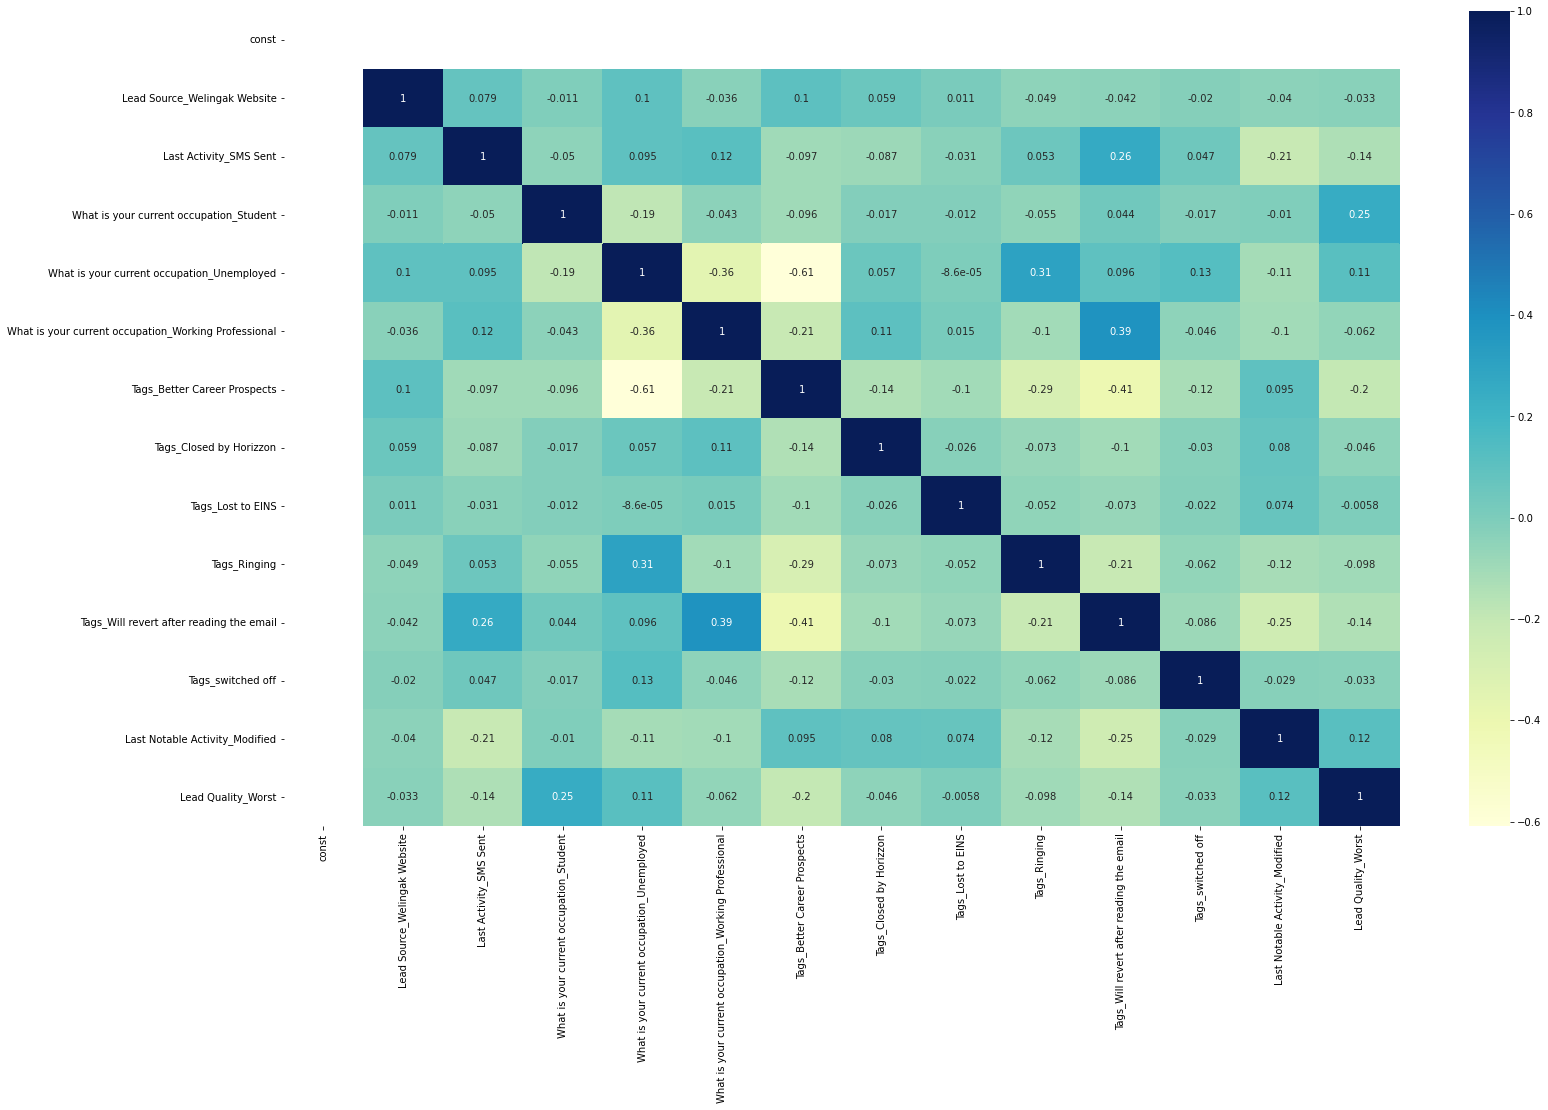

In [112]:
# Let's visualise correlation

plt.figure(figsize = (25,15))  
sns.heatmap(X3.corr(),annot = True, cmap= "YlGnBu")
plt.show()

Based on the VIF values and the information depicted in the heat maps, it is evident that there is minimal evidence of multicollinearity among the variables. Each variable maintains a favorable VIF value. Additionally, these features hold significant business relevance. Hence, there is no necessity to eliminate further variables, and we can confidently move forward with making predictions using this model as it stands

In [113]:
# predictions

y_train_predFinal = Pred_vals(X3,Log_Mod3)
y_train_predFinal.head()

,Converted,Converted_probability,Lead ID,predicted
0,0,0.105111,3009,0
1,0,0.611265,1012,1
2,0,0.012524,9226,0
3,1,0.553082,4750,1
4,1,0.999304,7987,1


In [114]:
# Creating confusion matrix and calculating accuracy
confusion_matrix = confn_matrix(y_train_predFinal.Converted,y_train_predFinal.predicted)

Confusion Matrix:
[[3641  264]
 [ 189 2257]]
Training Accuracy:  0.9286726499763817


This represents our Final model:

* All p-values are effectively zero.
* Multicollinearity is virtually non-existent, with exceptionally low VIFs across all features.
* The training accuracy of 92.86% achieved at a probability threshold of 0.05 is highly commendable.

#### Other Metrics

In [115]:
other_metrix(confusion_matrix)

Sensitivity:  0.9227309893704007
Specificity:  0.9323943661971831
False postive rate 0.0676056338028169
Positive predictive value:  0.8952796509321698
Negative predictive value:  0.9506527415143603


### ROC Curve

In [116]:
def Roc_Curve(act,prob):
    fpr, tpr, thresholds = metrics.roc_curve(act, prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(act, prob)
    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [117]:
fprr, tprr, threshld = metrics.roc_curve(y_train_predFinal.Converted, y_train_predFinal.Converted_probability, drop_intermediate = False)

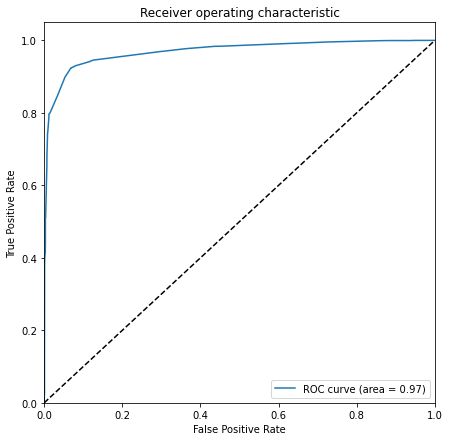

In [118]:
# Roc Curve
Roc_Curve(y_train_predFinal.Converted, y_train_predFinal.Converted_probability)

In [119]:
print("Area under curve: ", metrics.roc_auc_score(y_train_predFinal.Converted, y_train_predFinal.Converted_probability))

Area under curve:  0.9695445175326097


The obtained AUC value is approximately 0.97, which is good as it is close to the ideal AUC of 1.

### Optimal Cutoff Point

In [120]:
# Creating columns with different probabilities

nums = [float(i)/10 for i in range(10)]

for num in nums:
    y_train_predFinal[num]= y_train_predFinal.Converted_probability.map(lambda x: 1 if x > num else 0)
y_train_predFinal.head()

,Converted,Converted_probability,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.105111,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.611265,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.012524,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.553082,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.999304,7987,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# To compute accuracy, sensitivity, and specificity across different probability cutoffs.

cut_off_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])

prob_cutoffs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for p in prob_cutoffs:
    confusion_matrix1 = metrics.confusion_matrix(y_train_predFinal.Converted, y_train_predFinal[p] )
    total_cm1=sum(sum(confusion_matrix1))
    accuracy = (confusion_matrix1[0,0]+confusion_matrix1[1,1])/total_cm1
    
    specificity = confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[0,1])
    sensitivity = confusion_matrix1[1,1]/(confusion_matrix1[1,0]+confusion_matrix1[1,1])
    cut_off_df.loc[p] =[ p ,accuracy,sensitivity,specificity]
print(cut_off_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.803338     0.969747     0.699104
0.2          0.2  0.923634     0.930090     0.919590
0.3          0.3  0.928830     0.923549     0.932138
0.4          0.4  0.928673     0.923140     0.932138
0.5          0.5  0.928673     0.922731     0.932394
0.6          0.6  0.913714     0.799264     0.985403
0.7          0.7  0.913872     0.798446     0.986172
0.8          0.8  0.912297     0.791496     0.987964
0.9          0.9  0.895292     0.741619     0.991549


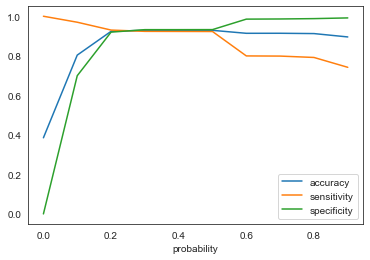

In [122]:
# To create a graphical representation of accuracy, sensitivity, and specificity across different probability values.

sns.set_style('white')
cut_off_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()


Based on the preceding curve, the **optimal cutoff probability to consider is 0.2**.

In [123]:
# For predictions we wll now use 0.2 as threshold

y_train_predFinal['final_prediction'] = y_train_predFinal.Converted_probability.map(lambda x: 1 if x > 0.4 else 0)

y_train_predFinal.head()

,Converted,Converted_probability,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.105111,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.611265,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.012524,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.553082,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.999304,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [124]:
# lets calculate overall accuracy and confusion matrix

confusion_matrix2 = confn_matrix(y_train_predFinal.Converted,y_train_predFinal.final_prediction)

Confusion Matrix:
[[3640  265]
 [ 188 2258]]
Training Accuracy:  0.9286726499763817


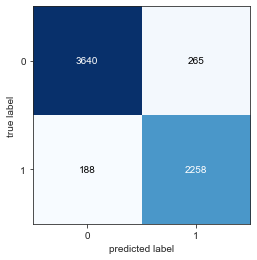

In [125]:
# Plotting confusion matrix

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix2)
plt.show()

In [126]:
# now the other metrics

other_metrix(confusion_matrix2)

Sensitivity:  0.9231398201144726
Specificity:  0.9321382842509603
False postive rate 0.0678617157490397
Positive predictive value:  0.894966309948474
Negative predictive value:  0.9508881922675027


#### Classification_Report

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_train_predFinal.Converted, y_train_predFinal.final_prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3905
           1       0.89      0.92      0.91      2446

    accuracy                           0.93      6351
   macro avg       0.92      0.93      0.93      6351
weighted avg       0.93      0.93      0.93      6351



### Precision & Recall

formula for precision is:
Precision = TP / TP + FP

In [128]:
print('Precision:',confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1]))

Precision: 0.8952796509321698


formula for Recall is: Recall = TP / TP + FN

In [129]:
print('Recall:',confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1]))

Recall: 0.9227309893704007


Now findout using SKlearn

In [130]:
from sklearn.metrics import precision_score, recall_score

In [131]:
precision_score(y_train_predFinal.Converted, y_train_predFinal.predicted)

0.8952796509321698

In [132]:
recall_score(y_train_predFinal.Converted, y_train_predFinal.predicted)

0.9227309893704007

We are getting same results

### Precision & Recall Trade-off

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_predFinal.Converted, y_train_predFinal.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_predFinal.Converted, y_train_predFinal.Converted_probability)

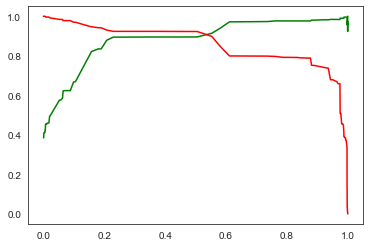

In [136]:
# Creating a graph that illustrates precision and recall across various threshold values.

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Based on the preceding curve depicting Precision-Recall, **the optimal cutoff probability to select is 0.25**. This threshold can also be used to assess accuracy.

In [137]:
# Utilizing a threshold of 0.25 for making predictions.

y_train_predFinal['final_predicted_PreRec'] = y_train_predFinal.Converted_probability.map(lambda x: 1 if x > 0.25 else 0)

y_train_predFinal.head()

,Converted,Converted_probability,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction,final_predicted_PreRec
0,0,0.105111,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.611265,1012,1,1,1,1,1,1,1,1,0,0,0,1,1
2,0,0.012524,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.553082,4750,1,1,1,1,1,1,1,0,0,0,0,1,1
4,1,0.999304,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [138]:
# CM for overall accuracy

confusion_matrix3 = confn_matrix(y_train_predFinal.Converted, y_train_predFinal.final_predicted_PreRec)

Confusion Matrix:
[[3640  265]
 [ 187 2259]]
Training Accuracy:  0.9288301054951976


In [139]:
# Other Mertix

other_metrix(confusion_matrix3)

Sensitivity:  0.9235486508585445
Specificity:  0.9321382842509603
False postive rate 0.0678617157490397
Positive predictive value:  0.8950079239302694
Negative predictive value:  0.9511366605696367


### Predictions on the Test Set

In [140]:
# Feature transformation on Test set

X_test[var_num] = scaler.fit_transform(X_test[var_num])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3271,0,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1490,0,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7936,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4216,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3830,0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [141]:
# Final features
X_tst_sm = X_test[Selected_cols2]

In [142]:
# adding a constant
X_tst_sm = sm.add_constant(X_tst_sm)

In [143]:
#  predictions

y_tst_pred = Log_Mod3.predict(X_tst_sm)

y_tst_pred[:10]

3271    0.105111
1490    0.977209
7936    0.105111
4216    0.979864
3830    0.105111
1800    0.977209
6507    0.062748
4821    0.005640
4223    0.997496
4714    0.189919
dtype: float64

In [144]:
# Convert the array y_pred into a DataFrame.

y_pred_01 = pd.DataFrame(y_tst_pred)

y_pred_01.head()

,0
3271,0.105111
1490,0.977209
7936,0.105111
4216,0.979864
3830,0.105111


In [145]:
# Converting to Dataframe

y_tst_df = pd.DataFrame(y_test)

In [146]:
# Adding Lead ID

y_tst_df['Lead ID'] = y_tst_df.index

In [147]:
# To remove the index from both dataframes so that they can be appended side by side.

y_pred_01.reset_index(drop=True, inplace=True)
y_tst_df.reset_index(drop=True, inplace=True)

In [148]:
# appending y_tst_df and y_pred_01

y_pred_fnl = pd.concat([y_tst_df, y_pred_01],axis=1)

y_pred_fnl.head()

,Converted,Lead ID,0
0,0,3271,0.105111
1,1,1490,0.977209
2,0,7936,0.105111
3,1,4216,0.979864
4,0,3830,0.105111


In [149]:
# renaming column

y_pred_fnl= y_pred_fnl.rename(columns={ 0 : 'Converted_probability'})

y_pred_fnl.head()

,Converted,Lead ID,Converted_probability
0,0,3271,0.105111
1,1,1490,0.977209
2,0,7936,0.105111
3,1,4216,0.979864
4,0,3830,0.105111


In [150]:
# Setting threshold of 0.2

y_pred_fnl['final_prediction'] = y_pred_fnl.Converted_probability.map(lambda x: 1 if x > 0.2 else 0)

y_pred_fnl.head()

,Converted,Lead ID,Converted_probability,final_prediction
0,0,3271,0.105111,0
1,1,1490,0.977209,1
2,0,7936,0.105111,0
3,1,4216,0.979864,1
4,0,3830,0.105111,0


In [151]:
# AUC

print("The Area under curve is: ", metrics.roc_auc_score(y_pred_fnl.Converted, y_pred_fnl.Converted_probability))

The Area under curve is:  0.9596597754072187


In [152]:
# CM and overall accuracy

conf_test = confn_matrix(y_pred_fnl.Converted,y_pred_fnl.final_prediction)

Confusion Matrix:
[[1582  152]
 [  86  903]]
Training Accuracy:  0.9125964010282777


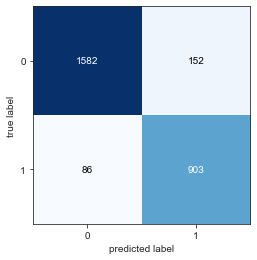

In [153]:
# plotting CM

plot_confusion_matrix(conf_mat=conf_test)
plt.show()

In [154]:
# other metrix

other_metrix(conf_test)

Sensitivity:  0.9130434782608695
Specificity:  0.9123414071510957
False postive rate 0.08765859284890427
Positive predictive value:  0.8559241706161137
Negative predictive value:  0.9484412470023981


#### Classification report

In [155]:
print(classification_report(y_pred_fnl.Converted, y_pred_fnl.final_prediction))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1734
           1       0.86      0.91      0.88       989

    accuracy                           0.91      2723
   macro avg       0.90      0.91      0.91      2723
weighted avg       0.91      0.91      0.91      2723



### Model Building using Principal Component Analysis (PCA) 

In [156]:
# Improt PCA
from sklearn.decomposition import PCA

Prin_comp_analysis = PCA(svd_solver='randomized', random_state=42)

In [157]:
# fitiing on train data
Prin_comp_analysis.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [158]:
Prin_comp_analysis.explained_variance_ratio_

array([2.91152957e-01, 1.06875356e-01, 7.57234607e-02, 6.95609704e-02,
       4.56025256e-02, 3.98684965e-02, 3.82536511e-02, 3.03308058e-02,
       2.66838784e-02, 1.71384990e-02, 1.43328916e-02, 1.32154549e-02,
       1.26733372e-02, 1.24286517e-02, 1.16992751e-02, 1.13683576e-02,
       1.05721892e-02, 9.76736072e-03, 9.08339380e-03, 8.93434150e-03,
       8.61785406e-03, 8.16124726e-03, 7.56767164e-03, 6.85863284e-03,
       6.46338421e-03, 5.86285876e-03, 5.70959732e-03, 5.59059129e-03,
       5.25232573e-03, 5.03310817e-03, 4.82669122e-03, 4.15805407e-03,
       4.05340639e-03, 3.86418031e-03, 3.62735262e-03, 3.20223770e-03,
       2.94053743e-03, 2.81457501e-03, 2.73108127e-03, 2.63006305e-03,
       2.54707141e-03, 2.44385981e-03, 2.37240453e-03, 2.26815071e-03,
       2.16037672e-03, 2.05914511e-03, 1.81744371e-03, 1.80533027e-03,
       1.75116288e-03, 1.62966958e-03, 1.53500043e-03, 1.51162931e-03,
       1.49781423e-03, 1.48816152e-03, 1.42747137e-03, 1.38075277e-03,
      

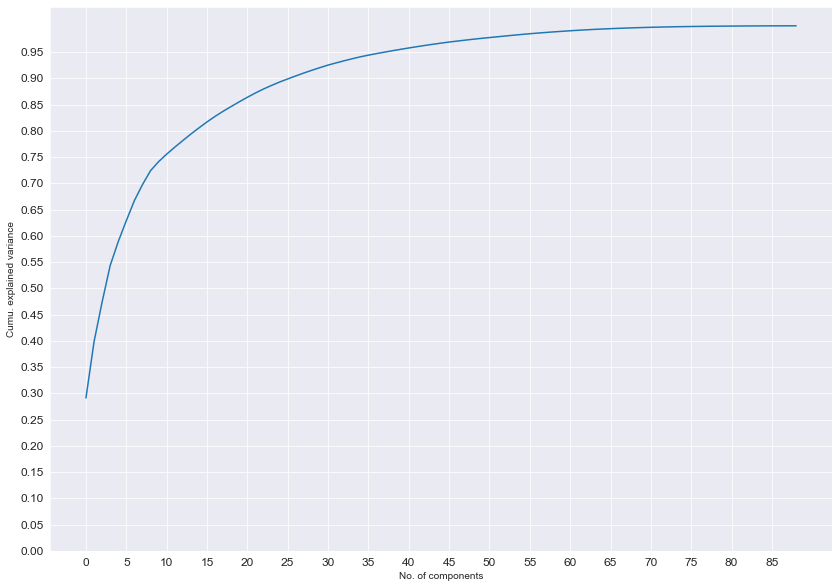

In [159]:
# Plotting a screen plot

fig = plt.figure(figsize = (14,10))

sns.set_style('darkgrid')
plt.plot(np.cumsum(Prin_comp_analysis.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cumu. explained variance')

plt.xticks(np.arange(0, 90, step=5), size = 12)
plt.yticks(np.arange(0.0, 1.0, step=0.05), size = 12)
plt.show()

sns.set_style('darkgrid')

It appears that utilizing **25 components** is sufficient to capture **90%** of the variance within the dataset. We will select 25 components for our modeling purposes.

In [160]:
# Using incremental PCA

from sklearn.decomposition import IncrementalPCA

Prin_comp_analysis_final = IncrementalPCA(n_components=25)

In [161]:
# To Obtain the principal components from the training data.

train_pca_df = Prin_comp_analysis_final.fit_transform(X_train)

train_pca_df.shape

(6351, 25)

In [162]:
# Correlation matrix

Corr_Matrix = np.corrcoef(train_pca_df.transpose())

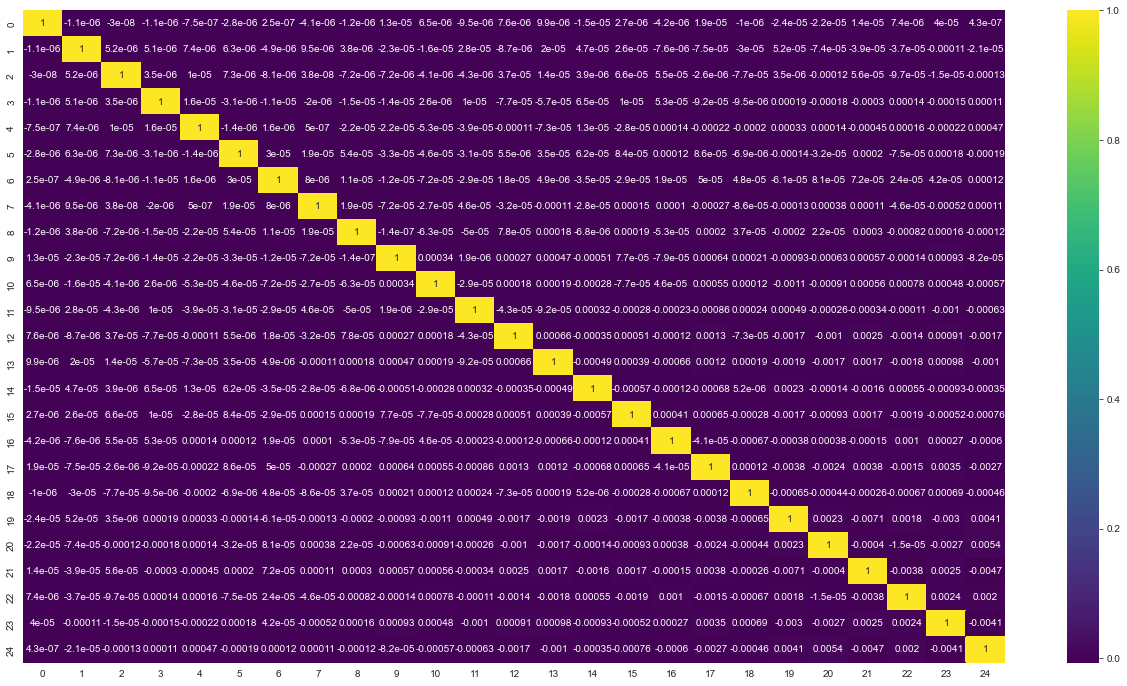

In [163]:
plt.figure(figsize = (22,12))
sns.heatmap(Corr_Matrix,annot = True, cmap="viridis")

As anticipated, there is minimal to no correlation among the principal components.

In [164]:
# Applying the chosen components on the test data.

test_pca_df = Prin_comp_analysis_final.transform(X_test)
test_pca_df.shape

(2723, 25)

#### Performing Logistic Regression on the Principal Components

In [165]:
# training the model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

PCA_linear = LogisticRegression()
PCA_model = PCA_linear.fit(train_pca_df,y_train)

#### Predictions

In [166]:
# Train data

predicted_probs_train = PCA_model.predict_proba(train_pca_df)[:,1]
print("Area under curve (AUC): ", metrics.roc_auc_score(y_train, predicted_probs_train))

Area under curve (AUC):  0.9592368004204518


In [167]:
# test data

predicted_probs_test = PCA_model.predict_proba(test_pca_df)[:,1]
print("Area under curve (AUC): ", metrics.roc_auc_score(y_test, predicted_probs_test))

Area under curve (AUC):  0.9427584630473852


model built using RFE is better than the model built using PCA. So we will use that

### Lead Score Assignment

In [168]:
# Selecting test set

leads_tst_pred = y_pred_fnl.copy()
leads_tst_pred.head()

,Converted,Lead ID,Converted_probability,final_prediction
0,0,3271,0.105111,0
1,1,1490,0.977209,1
2,0,7936,0.105111,0
3,1,4216,0.979864,1
4,0,3830,0.105111,0


In [169]:
# Selecting train set

leads_trn_pred = y_train_predFinal.copy()
leads_trn_pred.head()

,Converted,Converted_probability,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction,final_predicted_PreRec
0,0,0.105111,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.611265,1012,1,1,1,1,1,1,1,1,0,0,0,1,1
2,0,0.012524,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.553082,4750,1,1,1,1,1,1,1,0,0,0,0,1,1
4,1,0.999304,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [170]:
# Removing redundant columns from the training dataset.

leads_trn_pred = leads_trn_pred[['Lead ID','Converted','Converted_probability','final_prediction']]
leads_trn_pred.head()

,Lead ID,Converted,Converted_probability,final_prediction
0,3009,0,0.105111,0
1,1012,0,0.611265,1
2,9226,0,0.012524,0
3,4750,1,0.553082,1
4,7987,1,0.999304,1


In [171]:
# Concatenating 2 datasets
leads_final_pred = leads_trn_pred.append(leads_tst_pred)
leads_final_pred.head()

,Lead ID,Converted,Converted_probability,final_prediction
0,3009,0,0.105111,0
1,1012,0,0.611265,1
2,9226,0,0.012524,0
3,4750,1,0.553082,1
4,7987,1,0.999304,1


In [172]:
# Checikng the shape of the final dataset

print(leads_trn_pred.shape)
print(leads_tst_pred.shape)
print(leads_final_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [173]:
# Ensuring uniqueness of Lead IDs

len(leads_final_pred['Lead ID'].unique().tolist())

9074

In [174]:
# Calculation of the Lead Score

leads_final_pred['Lead_Score'] = leads_final_pred['Converted_probability'].apply(lambda x : round(x*100))
leads_final_pred.head()

,Lead ID,Converted,Converted_probability,final_prediction,Lead_Score
0,3009,0,0.105111,0,11
1,1012,0,0.611265,1,61
2,9226,0,0.012524,0,1
3,4750,1,0.553082,1,55
4,7987,1,0.999304,1,100


In [175]:
# Making the Lead ID column as index

leads_final_pred = leads_final_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
leads_final_pred.head()

,Converted,Converted_probability,final_prediction,Lead_Score
Lead ID,,,,
0,0,0.018042,0,2
1,0,0.006314,0,1
2,1,0.964296,1,96
3,0,0.001202,0,0
4,1,0.877491,1,88


In [176]:
# To extract the 'Lead Number' column from the original dataset.

leads_og = leads_df_og[['Lead Number']]
leads_og.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [177]:
# To merge the two dataframes based on their respective indices.

leads_and_score = pd.concat([leads_og, leads_final_pred], axis=1)
leads_and_score.head()

,Lead Number,Converted,Converted_probability,final_prediction,Lead_Score
0,660737,0.0,0.018042,0.0,2.0
1,660728,0.0,0.006314,0.0,1.0
2,660727,1.0,0.964296,1.0,96.0
3,660719,0.0,0.001202,0.0,0.0
4,660681,1.0,0.877491,1.0,88.0


We've created a new dataframe that contains "Lead Number" and "Lead Score." Having "Lead Number" in this dataframe will facilitate convenient cross-referencing with the original dataset.

### Feature Importance

In [178]:
# To showcase the features along with their corresponding coefficients in the final model.

pd.options.display.float_format = '{:.2f}'.format
nw_params = Log_Mod3.params[1:]
nw_params

Lead Source_Welingak Website                            2.64
Last Activity_SMS Sent                                  2.35
What is your current occupation_Student                 2.13
What is your current occupation_Unemployed              2.47
What is your current occupation_Working Professional    2.59
Tags_Better Career Prospects                            2.66
Tags_Closed by Horizzon                                 8.22
Tags_Lost to EINS                                       8.91
Tags_Ringing                                           -2.73
Tags_Will revert after reading the email                5.97
Tags_switched off                                      -2.84
Last Notable Activity_Modified                         -1.66
Lead Quality_Worst                                     -2.91
dtype: float64

In [179]:
# Relative feature imp

feature_imps = nw_params
feature_imps = 100.0 * (feature_imps / feature_imps.max())
feature_imps

Lead Source_Welingak Website                            29.61
Last Activity_SMS Sent                                  26.42
What is your current occupation_Student                 23.92
What is your current occupation_Unemployed              27.70
What is your current occupation_Working Professional    29.11
Tags_Better Career Prospects                            29.85
Tags_Closed by Horizzon                                 92.22
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -30.58
Tags_Will revert after reading the email                66.94
Tags_switched off                                      -31.86
Last Notable Activity_Modified                         -18.67
Lead Quality_Worst                                     -32.71
dtype: float64

In [180]:
# Sorting based on importance

sorted_feat = np.argsort(feature_imps,kind='quicksort',order='list of str')
sorted_feat

Lead Source_Welingak Website                            12
Last Activity_SMS Sent                                  10
What is your current occupation_Student                  8
What is your current occupation_Unemployed              11
What is your current occupation_Working Professional     2
Tags_Better Career Prospects                             1
Tags_Closed by Horizzon                                  3
Tags_Lost to EINS                                        4
Tags_Ringing                                             0
Tags_Will revert after reading the email                 5
Tags_switched off                                        9
Last Notable Activity_Modified                           6
Lead Quality_Worst                                       7
dtype: int64

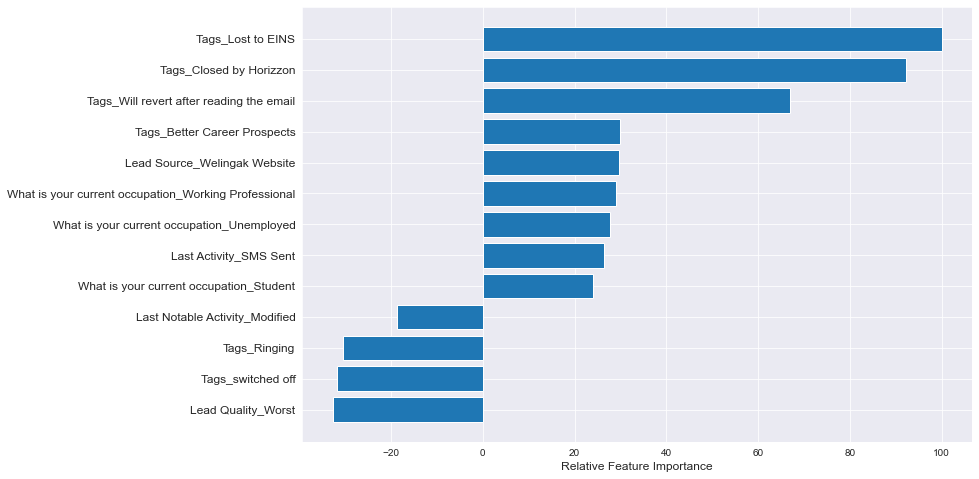

In [181]:
# To visualize the features and their respective importance.
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_feat.shape[0])
ax.barh(pos, feature_imps[sorted_feat])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[Selected_cols2].columns)[sorted_feat], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

### Conclusion:

After experimenting with multiple models, our ultimate model exhibits the following characteristics:

- All p-values are extremely close to zero.
- The VIFs for all features are exceptionally low, indicating minimal multicollinearity.
- The overall testing accuracy of **91.25%** at a probability threshold of 0.05 is highly impressive.



The **optimal threshold for the model is 0.25**, determined by striking a balance between sensitivity, specificity, and accuracy. Depending on business requirements, this threshold can be adjusted to enhance or diminish a particular performance metric.

A high level of sensitivity ensures that a significant portion of leads likely to convert are accurately predicted, whereas a high degree of specificity ensures that a significant portion of leads unlikely to convert are accurately predicted.

Thirteen features have been identified as the most critical in predicting conversion:

Features that **positively** influence the probability of conversion, listed in **descending order** of their impact:

* Tags_Lost to EINS
* Tags_Closed by Horizzon
* Tags_Will revert after reading the email
* Tags_Better Career Prospects
* Lead Source_Welingak Website
* What is your current occupation_Working Professional
* What is your current occupation_Unemployed
* Last Activity_SMS Sent
* What is your current occupation_Student

Features that have a **negative impact** on the probability of conversion, listed in **descending order** of their impact.

* Lead Quality_Worst
* Tags_switched off
* Tags_Ringing
* Last Notable Activity_Modified